# Capstone Project - (Interim Report)

Project : Customer Churn

Project Team
<table>
<tr><th>Name </th><th>Email</th></tr>
<tr><td>J K Rama Krishna</td><td>chjkramakrishna@gmail.com </td></tr>
<tr><td>Suraj</td><td>surajharidas19@gmail.com </td></tr>
<tr><td>Indusree</td><td>indushiny1212@gmail.com </td></tr>
<tr><td>Adarsh S Shetty </td><td>adarshaditya619@gmail.com </td></tr>
<tr><td>Deepak T M</td><td>Deepak.tm@gmail.com </td></tr>
</table> <BR>


<h2>Problem Statement - Customer Churn (PS1)</h2><br>

An E Commerce company or DTH (you can choose either of these two domains) provider is  facing a lot of competition in the current market and it has become a challenge to retain the  existing customers in the current situation. Hence, the company wants to develop a model  through which they can do churn prediction of the accounts and provide segmented offers to the  potential churners. In this company, account churn is a major thing because 1 account can have  multiple customers. hence by losing one account the company might be losing more than one  customer. <br>
You have been assigned to develop a churn prediction model for this company and provide  business recommendations on the campaign. <br>
Your campaign suggestion should be unique and be very clear on the campaign offer because  your recommendation will go through the revenue assurance team. If they find that you are  giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going  to approve your recommendation. <br>
Hence be very careful while providing campaign recommendation.<br>

### Variables (VD1)

<table>
  <tr><th>Variable</th><th>Description</th></tr>
  <<tr><td>AccountID  </td><td>account unique identifier</td></tr>
<tr><td>Churn  </td><td>account churn flag (Target)</td></tr>
<tr><td>Tenure  </td><td>Tenure of account</td></tr>
<tr><td>City_Tier  </td><td>Tier of primary customer's city</td></tr>
<tr><td>CC_Contacted_L1 2m </td><td>How many times all the customers of the account has contacted customer care  in last 12months</td></tr>
<tr><td>Payment  </td><td>Preferred Payment mode of the customers in the account</td></tr>
<tr><td>Gender  </td><td>Gender of the primary customer of the account</td></tr>
<tr><td>Service_Score </td><td>Satisfaction score given by customers of the account on service provided by  company</td></tr>
<tr><td>Account_user_cou nt  </td><td>Number of customers tagged with this account</td></tr>
<tr><td>account_segment  </td><td>Account segmentation on the basis of spend</td></tr>
<tr><td>CC_Agent_Score </td><td>Satisfaction score given by customers of the account on customer care service  provided by company</td></tr>
<tr><td>Marital_Status  </td><td>Marital status of the primary customer of the account</td></tr>
<tr><td>rev_per_month  </td><td>Monthly average revenue generated by account in last 12 months</td></tr>
<tr><td>Complain_l12m  </td><td>Any complaints has been raised by account in last 12 months</td></tr>
<tr><td>rev_growth_yoy </td><td>revenue growth percentage of the account (last 12 months vs last 24 to 13  month)</td></tr>
<tr><td>coupon_used_l12 m </td><td>How many times customers have used coupons to do the payment in last 12  months</td></tr>
<tr><td>Day_Since_CC_co nnect </td><td>Number of days since no customers in the account has contacted the customer  care</td></tr>
<tr><td>cashback_l12m  </td><td>Monthly average cashback generated by account in last 12 months</td></tr>
<tr><td>Login_device  </td><td>Preferred login device of the customers in the account</td></tr>

</table>





## Python Libraries Used





In [ ]:
#INT1  importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Loading the data

In [ ]:
# Authorize your drive(select your gmail account and click on the "Allow" button to authorize the colab notebook to access your drive)
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the dataset from the drive <use csv or excel on your convenience> uncomment and use it according to the requirement

# df=pd.read_csv("/content/drive/MyDrive/Customer_Churn_DS/Customer_Churn_Data_new.csv")    # those who use csv file
df=pd.read_excel("/content/drive/My Drive/Capstone_Project_G7/Customer_Churn_Data.xlsx", sheet_name='Data for DSBA')

#Those who use jupiter notes upload the spreadsheet and use
#df=pd.read_excel('Customer_Churn_Data.xlsx', sheet_name='Data for DSBA')



## 2. Understanding the data


### Data Dimension (DU1)

In [ ]:
df.shape                               #Dimension of the data

(11260, 19)

There are 19 features and 11260 records in the dataset.

### Understanding the features and feature types (DU2)

In [ ]:
print(df.info())                  # returns not null value counts, data types of each columns in the dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

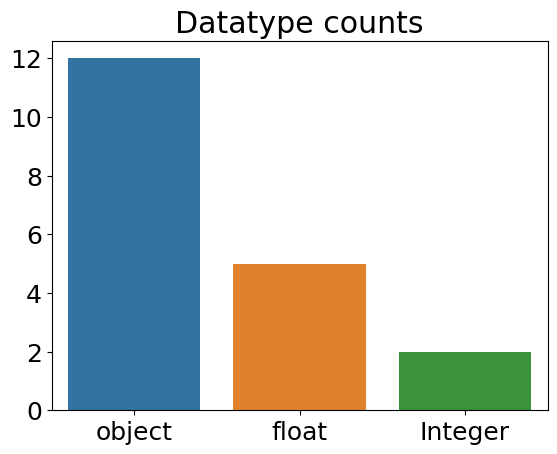

In [ ]:
d={'object':0, 'float':0, 'Integer':0}
for i in df.columns:
  if (df[i].dtype =='int64'):
    d['Integer']+=1
  elif (df[i].dtype =='float64'):
     d['float']+=1
  else:
    d['object']+=1

keys = list(d.keys())
values = list(d.values())
sns.barplot(x=keys, y=values).set(title='Datatype counts')
plt.show()# Show the plot

As per the basic analysis there are 12 catagorical  fields and 11 numerical fields. out of 11 numerical fields there are 2 ineger and 5 decimal columns. While checking the non-null value counts, It is not matching with the total record count. this represents presence of null values in some features.

# A glance of the data (DU3)

In [ ]:
df.head(3)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile


While comparing the data against the data type, some numerical filed such Tenure, Account_user_count, Revenue per month, rev_growth_yoy, coupon_used_for_payment, Day since conect and cashback are feteched as object. It represents the ppresaence of non-numerical values in the numerical fields. Lets furhter drill down the data by filtering it by unique value.

# To identify the unique values in the dataset (DU4)

In [ ]:

for col, ro in df.items():           # iterate each columns and rows through the dataset get the column label and row values
  print("Feature Name :", col, "         Data Type :", df[col].dtype, "\n")        # print column lable, its datatype and a new line
  print(df[col].unique(), "\n")          # print unique values
  print("__________________________________________________________________________")


Feature Name : AccountID          Data Type : int64 

[20000 20001 20002 ... 31257 31258 31259] 

__________________________________________________________________________
Feature Name : Churn          Data Type : int64 

[1 0] 

__________________________________________________________________________
Feature Name : Tenure          Data Type : object 

[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61] 

__________________________________________________________________________
Feature Name : City_Tier          Data Type : float64 

[ 3.  1. nan  2.] 

__________________________________________________________________________
Feature Name : CC_Contacted_LY          Data Type : float64 

[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.] 

________

The above code iterate through each feature in the dataset and fetch its unique values and print the same along with its name and data type. While looking at the output, there are some invalid characters such as #, @, *, $ and & present in some features.Also found some inconsistancy in the data in some features such as Gender and Account segments. Gender has been tracked as Female, F, Male, M. Similary, account_segment Regular Plus, Regular +, Super Plus and Super + . These irrgularities need to be corrected in the Feature Engineering section.

### Missing value identification (DU5)

In [ ]:
df.isnull().any() #returns if there is any null values in each feature

AccountID                  False
Churn                      False
Tenure                      True
City_Tier                   True
CC_Contacted_LY             True
Payment                     True
Gender                      True
Service_Score               True
Account_user_count          True
account_segment             True
CC_Agent_Score              True
Marital_Status              True
rev_per_month               True
Complain_ly                 True
rev_growth_yoy             False
coupon_used_for_payment    False
Day_Since_CC_connect        True
cashback                    True
Login_device                True
dtype: bool

There are null values almost all the fields except AccountID, Churn, rev_growth_yoy and coupon_used_for_payment.

In [ ]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

#### Percentage of Missing Values (DU6)

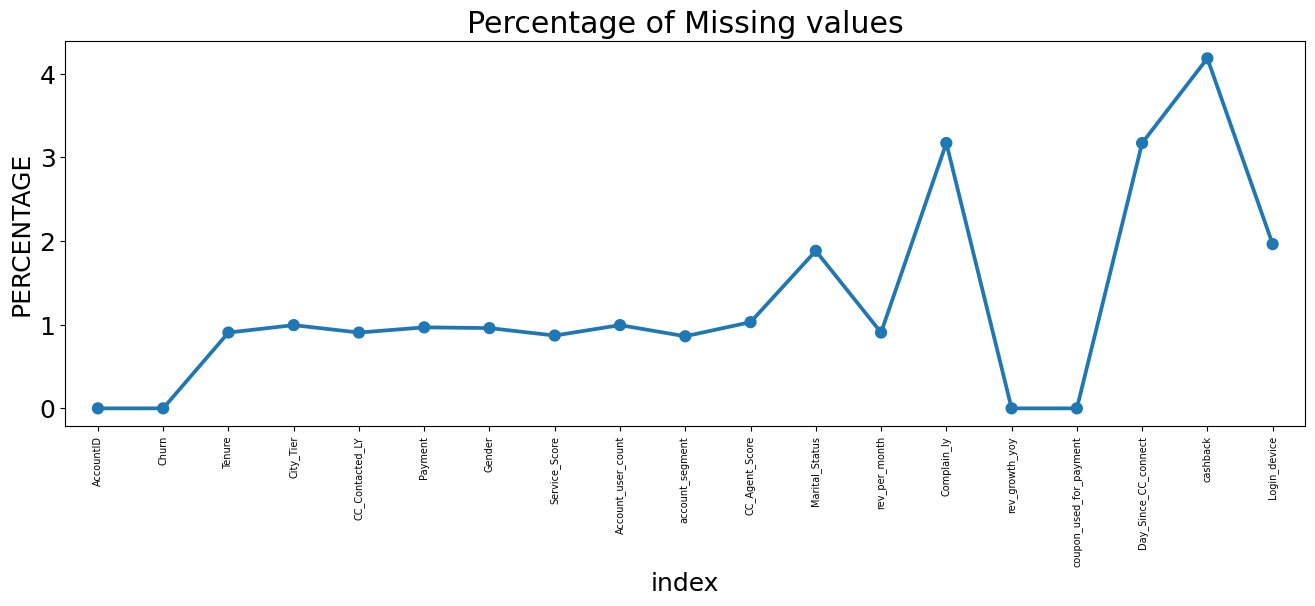

In [ ]:
# missing value percenage ploting-- Adarsh
missing = pd.DataFrame((df.isnull().sum() * 100 / df.shape[0]).reset_index())
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Duplicate value check (DU7)


In [ ]:
df[df.duplicated()]     # check for any duplicate values

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


The function Dataframe.duplicated() returned only the column headers. it means there are no duplicate rows\values in the dataset

### Data understanding Summary (DU8)
* There are 19 columns/Features 11260 records in the dataset
* The presence of invalid characters in numerical fields makes the numerical data type to object data types.
* There are presence of null values in most of the fields.

* There are no duplicate rows in the dataset

<hr>

## Feature Engineering

Feature engineering includes Feature Removal, Data Cleaning, Null value treatmentand Outlier Detection/Removal.



### 1. Feature Removal (FE1)

In [ ]:
# Feature removal
print("Column counts before removal:", len(df.columns))
df.drop("AccountID", inplace=True, axis= 1)
print("Column counts after removal:", len(df.columns))

Column counts before removal: 19
Column counts after removal: 18


In [ ]:
df.shape

(11260, 18)

- AccountID is a unique identification number given for each rows. It doesn't add value, so the AccountId field is removing. After removing the AccountID, we have 18 features.



### 2. Data Cleaning  (FE2)<br><p>
While analysing the data, there were the presence of invalid characters and inconsistancies in the dataset . The below codes will remove  all the invalid characters from the dataset.</p>

In [ ]:
# Cleaning special characters
df.replace(to_replace=['*','&', '$', '+', '@','#'], value=np.NaN, inplace=True)
df.replace(to_replace='&&&&', value='others', inplace=True)

# Correcting the inconsistent data
df['Gender'].replace(to_replace='Female', value='F', inplace=True)
df['Gender'].replace(to_replace='Male', value='M', inplace=True)
df['account_segment'].replace(to_replace='Regular +', value='Regular Plus', inplace=True)
df['account_segment'].replace(to_replace='Super +', value='Super Plus', inplace=True)

In [ ]:
# To identify the unique values in the dataset
for col, ro in df.items():           # iterate each columns and rows through the dataset get the column label and row values
  print("Feature Name :", col, "         Data Type :", df[col].dtype, "\n")        # print column lable, its datatype and a new line
  print(df[col].unique(), "\n")          # print unique values
  print("__________________________________________________________________________")

df.info()


Feature Name : Churn          Data Type : int64 

[1 0] 

__________________________________________________________________________
Feature Name : Tenure          Data Type : float64 

[ 4.  0.  2. 13. 11. nan  9. 99. 19. 20. 14.  8. 26. 18.  5. 30.  7.  1.
 23.  3. 29.  6. 28. 24. 25. 16. 10. 15. 22. 27. 12. 21. 17. 50. 60. 31.
 51. 61.] 

__________________________________________________________________________
Feature Name : City_Tier          Data Type : float64 

[ 3.  1. nan  2.] 

__________________________________________________________________________
Feature Name : CC_Contacted_LY          Data Type : float64 

[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.] 

__________________________________________________________________________
Feature Name : Payment          Data Type : object 

['Debit 

- All the invalid characters has been removed. Atfer removing the invalid characters. we have a clean datasaet of numerical and categorical fields.

### 3. Feature name correction (FE3)

For the purpose of clarity in the Feature names few labels are renamed for better understanding as below

In [ ]:
column_mapping = {
    'CC_Contacted_LY': 'Contacted_CC_in_lst_12M',
    'Service_Score': 'Service_Rating',
    'CC_Agent_Score' : 'Customer_CC_Rating',
    'rev_per_month' : 'Avg_Revenue_per_Mnth',
    'Complain_ly' : 'Complaint_recd_L_Yr',
    'rev_growth_yoy' : 'Percent_Annual_rev_growth'
    }
df=df.rename(columns=column_mapping)
print(df.columns)
df.info()

Index(['Churn', 'Tenure', 'City_Tier', 'Contacted_CC_in_lst_12M', 'Payment',
       'Gender', 'Service_Rating', 'Account_user_count', 'account_segment',
       'Customer_CC_Rating', 'Marital_Status', 'Avg_Revenue_per_Mnth',
       'Complaint_recd_L_Yr', 'Percent_Annual_rev_growth',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Login_device'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      11260 non-null  int64  
 1   Tenure                     11042 non-null  float64
 2   City_Tier                  11148 non-null  float64
 3   Contacted_CC_in_lst_12M    11158 non-null  float64
 4   Payment                    11151 non-null  object 
 5   Gender                     11152 non-null  object 
 6   Service_Rating             11162 non-nu

<p>
The below code with create lists of categorical (cat_fld) and numerical fields (num_fld) for target operations.</p>

In [ ]:
cat_fld=[]
num_fld=[]
for col_s in df.columns:
  if (df[col_s].dtype =='O'):
    cat_fld.append(col_s)
  else:
    num_fld.append(col_s)

# Eventhough some features are numerical dataype but they are categorical
num_fld.remove('City_Tier')
num_fld.remove('Service_Rating')
num_fld.remove('Account_user_count')
num_fld.remove('Customer_CC_Rating')
num_fld.remove('Complaint_recd_L_Yr')
num_fld.remove('Churn')

cat_fld.append('City_Tier')
cat_fld.append('Service_Rating')
cat_fld.append('Account_user_count')
cat_fld.append('Customer_CC_Rating')
cat_fld.append('Complaint_recd_L_Yr')
cat_fld.append('Churn')


print("Categorical fields:")
print("------------------")
for i in cat_fld:
  print(i)

print("\n Numerical fields:")
print("------------------")
for i in num_fld:
  print(i)


Categorical fields:
------------------
Payment
Gender
account_segment
Marital_Status
Login_device
City_Tier
Service_Rating
Account_user_count
Customer_CC_Rating
Complaint_recd_L_Yr
Churn

 Numerical fields:
------------------
Tenure
Contacted_CC_in_lst_12M
Avg_Revenue_per_Mnth
Percent_Annual_rev_growth
coupon_used_for_payment
Day_Since_CC_connect
cashback


### 4. Missing value treatment (FE4)

In [ ]:
# missing value treatment for categorical field
for itms in cat_fld:
  df[itms].fillna(df[itms].mode()[0], inplace = True)

# missing value treatment for numerical field
for itms in num_fld:
  df[itms].fillna(round(df[itms].mean(),0), inplace = True)


print("Categorical fields")
print("___________________")
print(df[cat_fld].isna().sum())
print(" ")
print("Numerical fields")
print("___________________")
print(df[num_fld].isna().sum())

Categorical fields
___________________
Payment                0
Gender                 0
account_segment        0
Marital_Status         0
Login_device           0
City_Tier              0
Service_Rating         0
Account_user_count     0
Customer_CC_Rating     0
Complaint_recd_L_Yr    0
Churn                  0
dtype: int64
 
Numerical fields
___________________
Tenure                       0
Contacted_CC_in_lst_12M      0
Avg_Revenue_per_Mnth         0
Percent_Annual_rev_growth    0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
dtype: int64


- All the null values in numerical fields are replaced with mean and categorical fileds are replaced with mode.

### 5. Outlier detection and removal. (FE5)

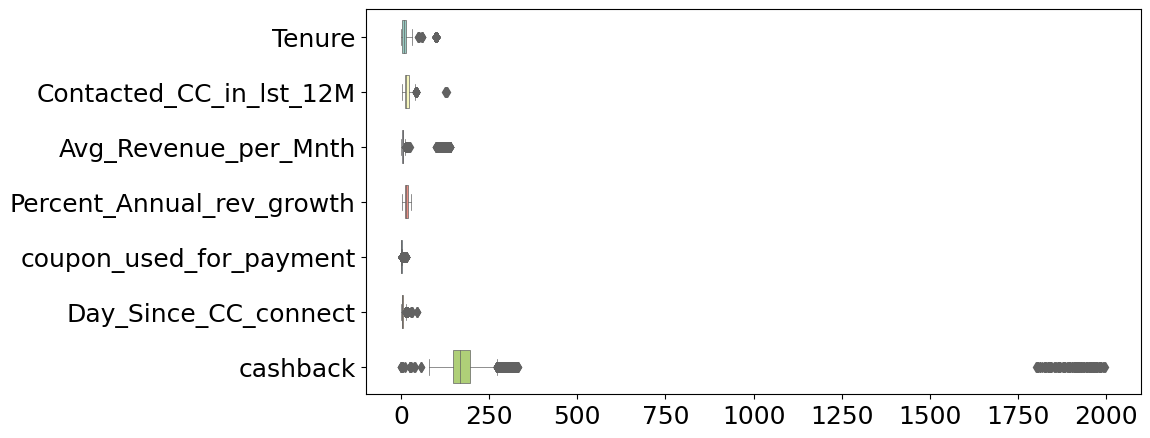

In [ ]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df[num_fld],width=0.6,palette="Set3",orient='h',linewidth=0.5)

Outliers are the extereme values present in the numerical fields which All the numerical fields has outliers. Cashback and Avg_Revenue_Per_Mnth has most numebers or outliers.

In [ ]:
def get_limits(col):         #Function to get upper limit and lower limit of 5 number summary
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    l_lmt= Q1-(1.5 * IQR)
    u_lmt= Q3+(1.5 * IQR)
    return u_lmt, l_lmt

#Outlier Treatment for the numeric columns
for itm in num_fld:
  ul,ll=get_limits(df[itm])
  df[itm]=np.where(df[itm]<ll,ll,df[itm])
  df[itm]=np.where(df[itm]>ul, ul,df[itm])


-The above code get the Upper limit and lower limit values in the data

#### Outlier detection and removal. (FE6)

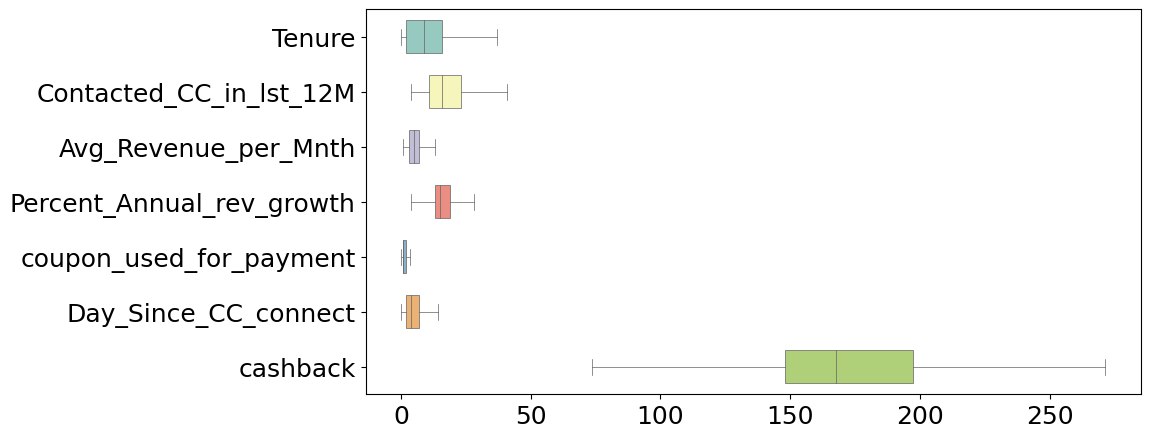

In [ ]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df[num_fld],width=0.6,palette="Set3",orient='h',linewidth=0.5)

Now the data is cleaned, removed inconsistancies and outliers. The data is now ready to go ahead with EDA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.00,0.00,0.00,0.00,1.00
Tenure,11260.0,10.290142,8.887725,0.00,2.00,9.00,16.00,37.00
City_Tier,11260.0,1.647425,0.912763,1.00,1.00,1.00,3.00,3.00
Contacted_CC_in_lst_12M,11260.0,17.833126,8.562396,4.00,11.00,16.00,23.00,41.00
Service_Rating,11260.0,2.903375,0.722476,0.00,2.00,3.00,3.00,5.00
Account_user_count,11260.0,3.704973,1.004383,1.00,3.00,4.00,4.00,6.00
Customer_CC_Rating,11260.0,3.065808,1.372663,1.00,2.00,3.00,4.00,5.00
Avg_Revenue_per_Mnth,11260.0,5.321048,2.884834,1.00,3.00,5.00,7.00,13.00
Complaint_recd_L_Yr,11260.0,0.276288,0.447181,0.00,0.00,0.00,1.00,1.00
Percent_Annual_rev_growth,11260.0,16.193339,3.757222,4.00,13.00,15.00,19.00,28.00


## Exploratory Data Analysis

### 1. Univariate Analysis (EDA1)

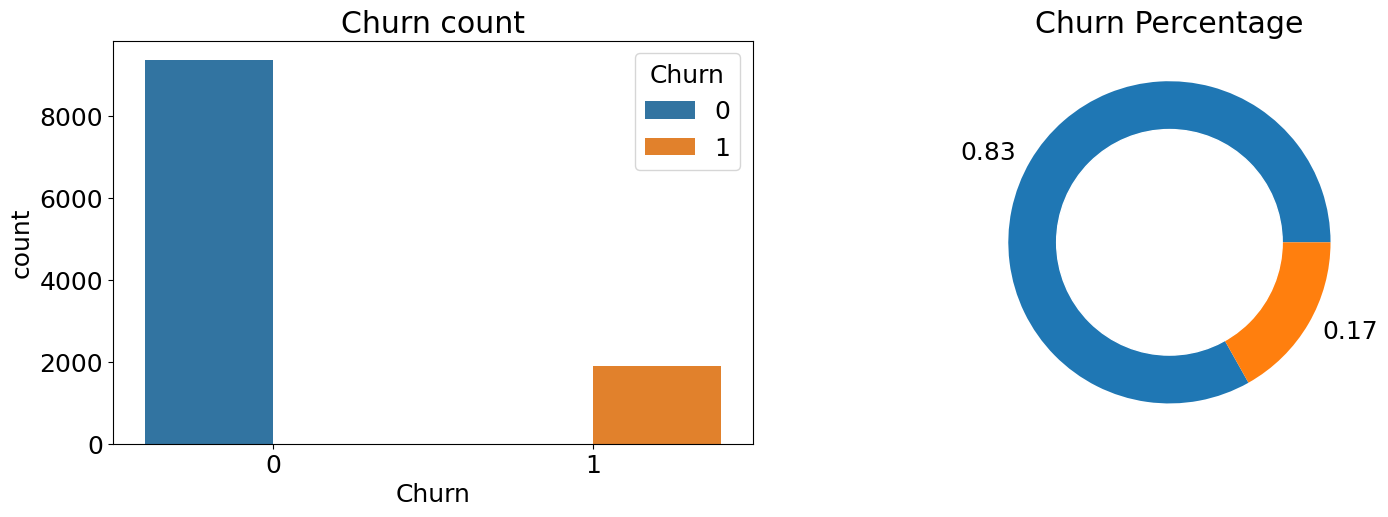

In [ ]:
percent=(df.value_counts('Churn').sort_index()/df['Churn'].count()) # calculating the Percentage of cuurn <item count/total>
fig, axs = plt.subplots(1, 2, figsize=(15,5))                       #defining subplot 15" * 5"

fig.tight_layout()                                                 #to auto adjust the padding between plots
axs[0].set_title("Churn count")                                    #setting title for fig 1 (countplot)
sns.countplot(x=df['Churn'], hue=df['Churn'],  ax=axs[0])          #ploting the bar grapht for each item

axs[1].pie(percent, labels=list(round(percent,2)))                 #ploting percentage of each item in pie chart
axs[1].set_title("Churn Percentage")                               #setting title for fig 2 (dougnut plot)
c = plt.Circle( (0,0), 0.7, color='white')                         #adding white circle to overlay pie plot
p=plt.gcf()
p.gca().add_artist(c)
plt.show()

Among all the users (11260) in the company about 17% of the users churned

#### Numerical fields (EDA2)

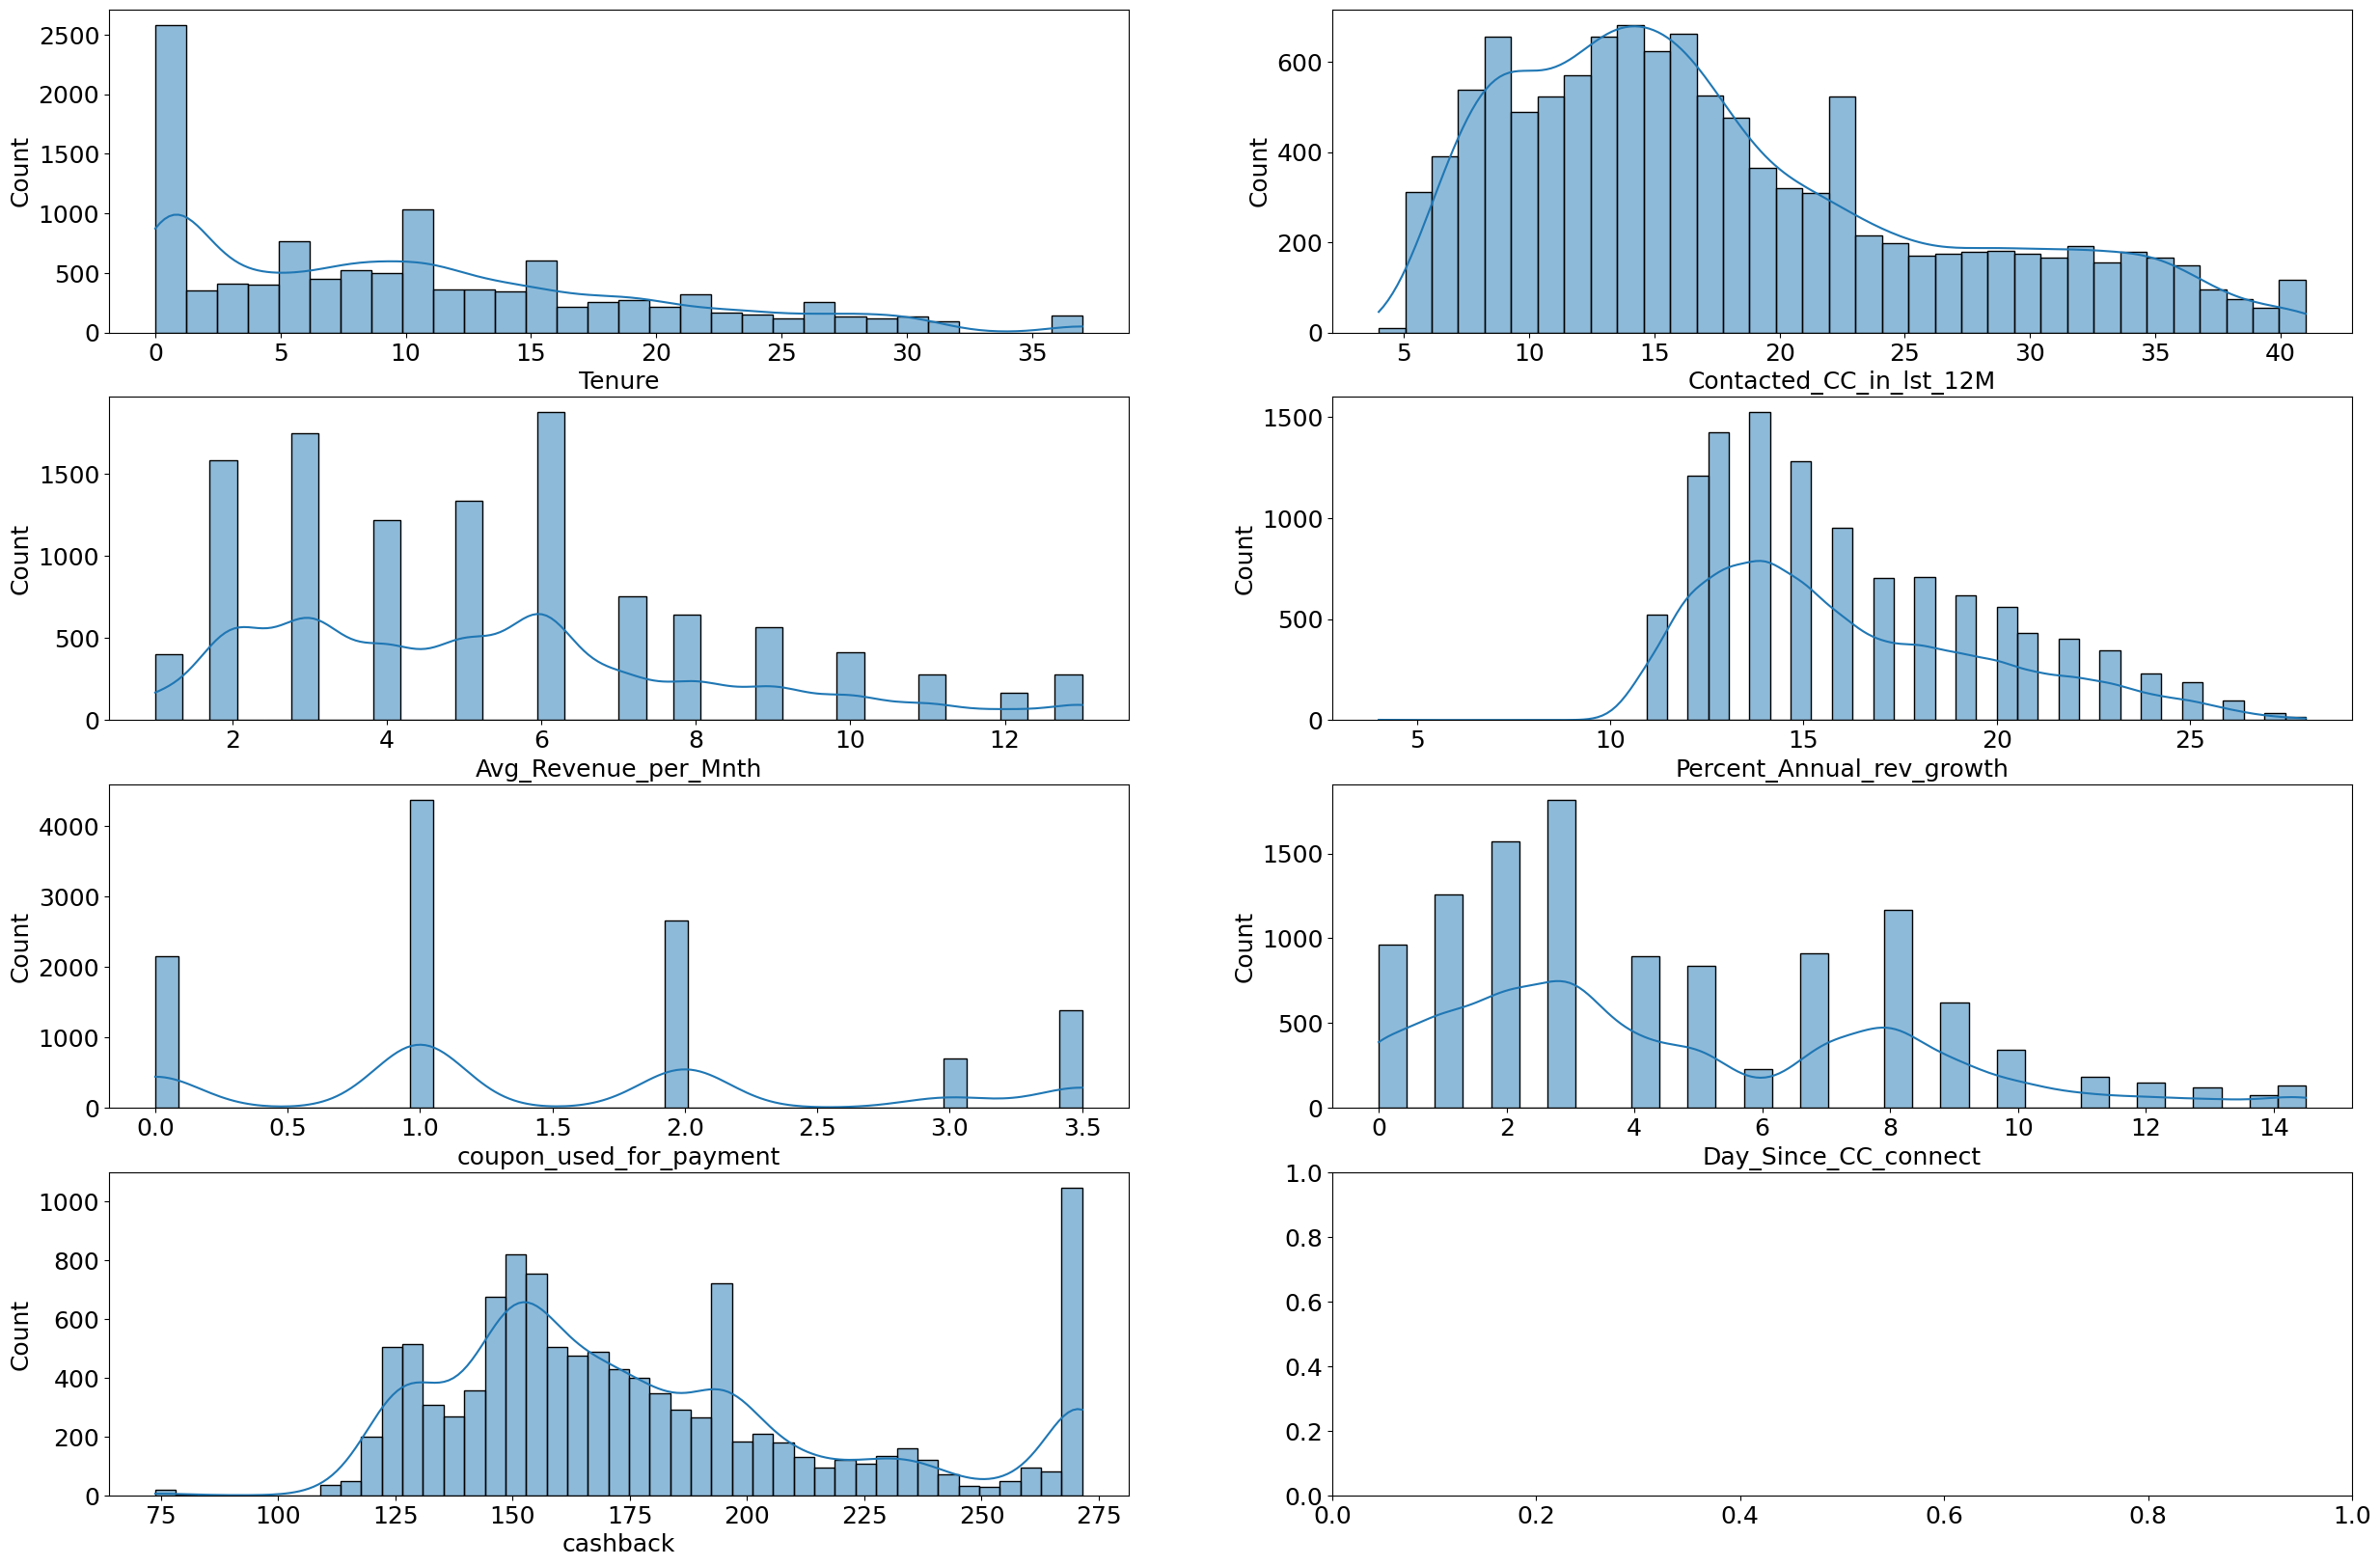

In [ ]:
#distribution numerical fields
fig, ax = plt.subplots(4, 2, figsize=(30, 20))                    # defining subplot  4*2
for i, subplot in zip(num_fld, ax.flatten()):                     # iterating through num_flds, subplot axis <ax.flattern convert the 2d array to 1d to iterate>
    sns.histplot(df[i], kde = True, ax=subplot)                   # ploting each histplot in numerical fileds to subplot

From the above bar chart it is observed that:
1. Majority of Customers have a tenure in the range of 1-20 Months.
2. Majority of customers contacted the Customer Care about 5-25 times in the last 12 months
3. Average revenue growth per customer is about 15
4. Average Cashback obtained by customer is about 150

#### Categorical fields (EDA3)

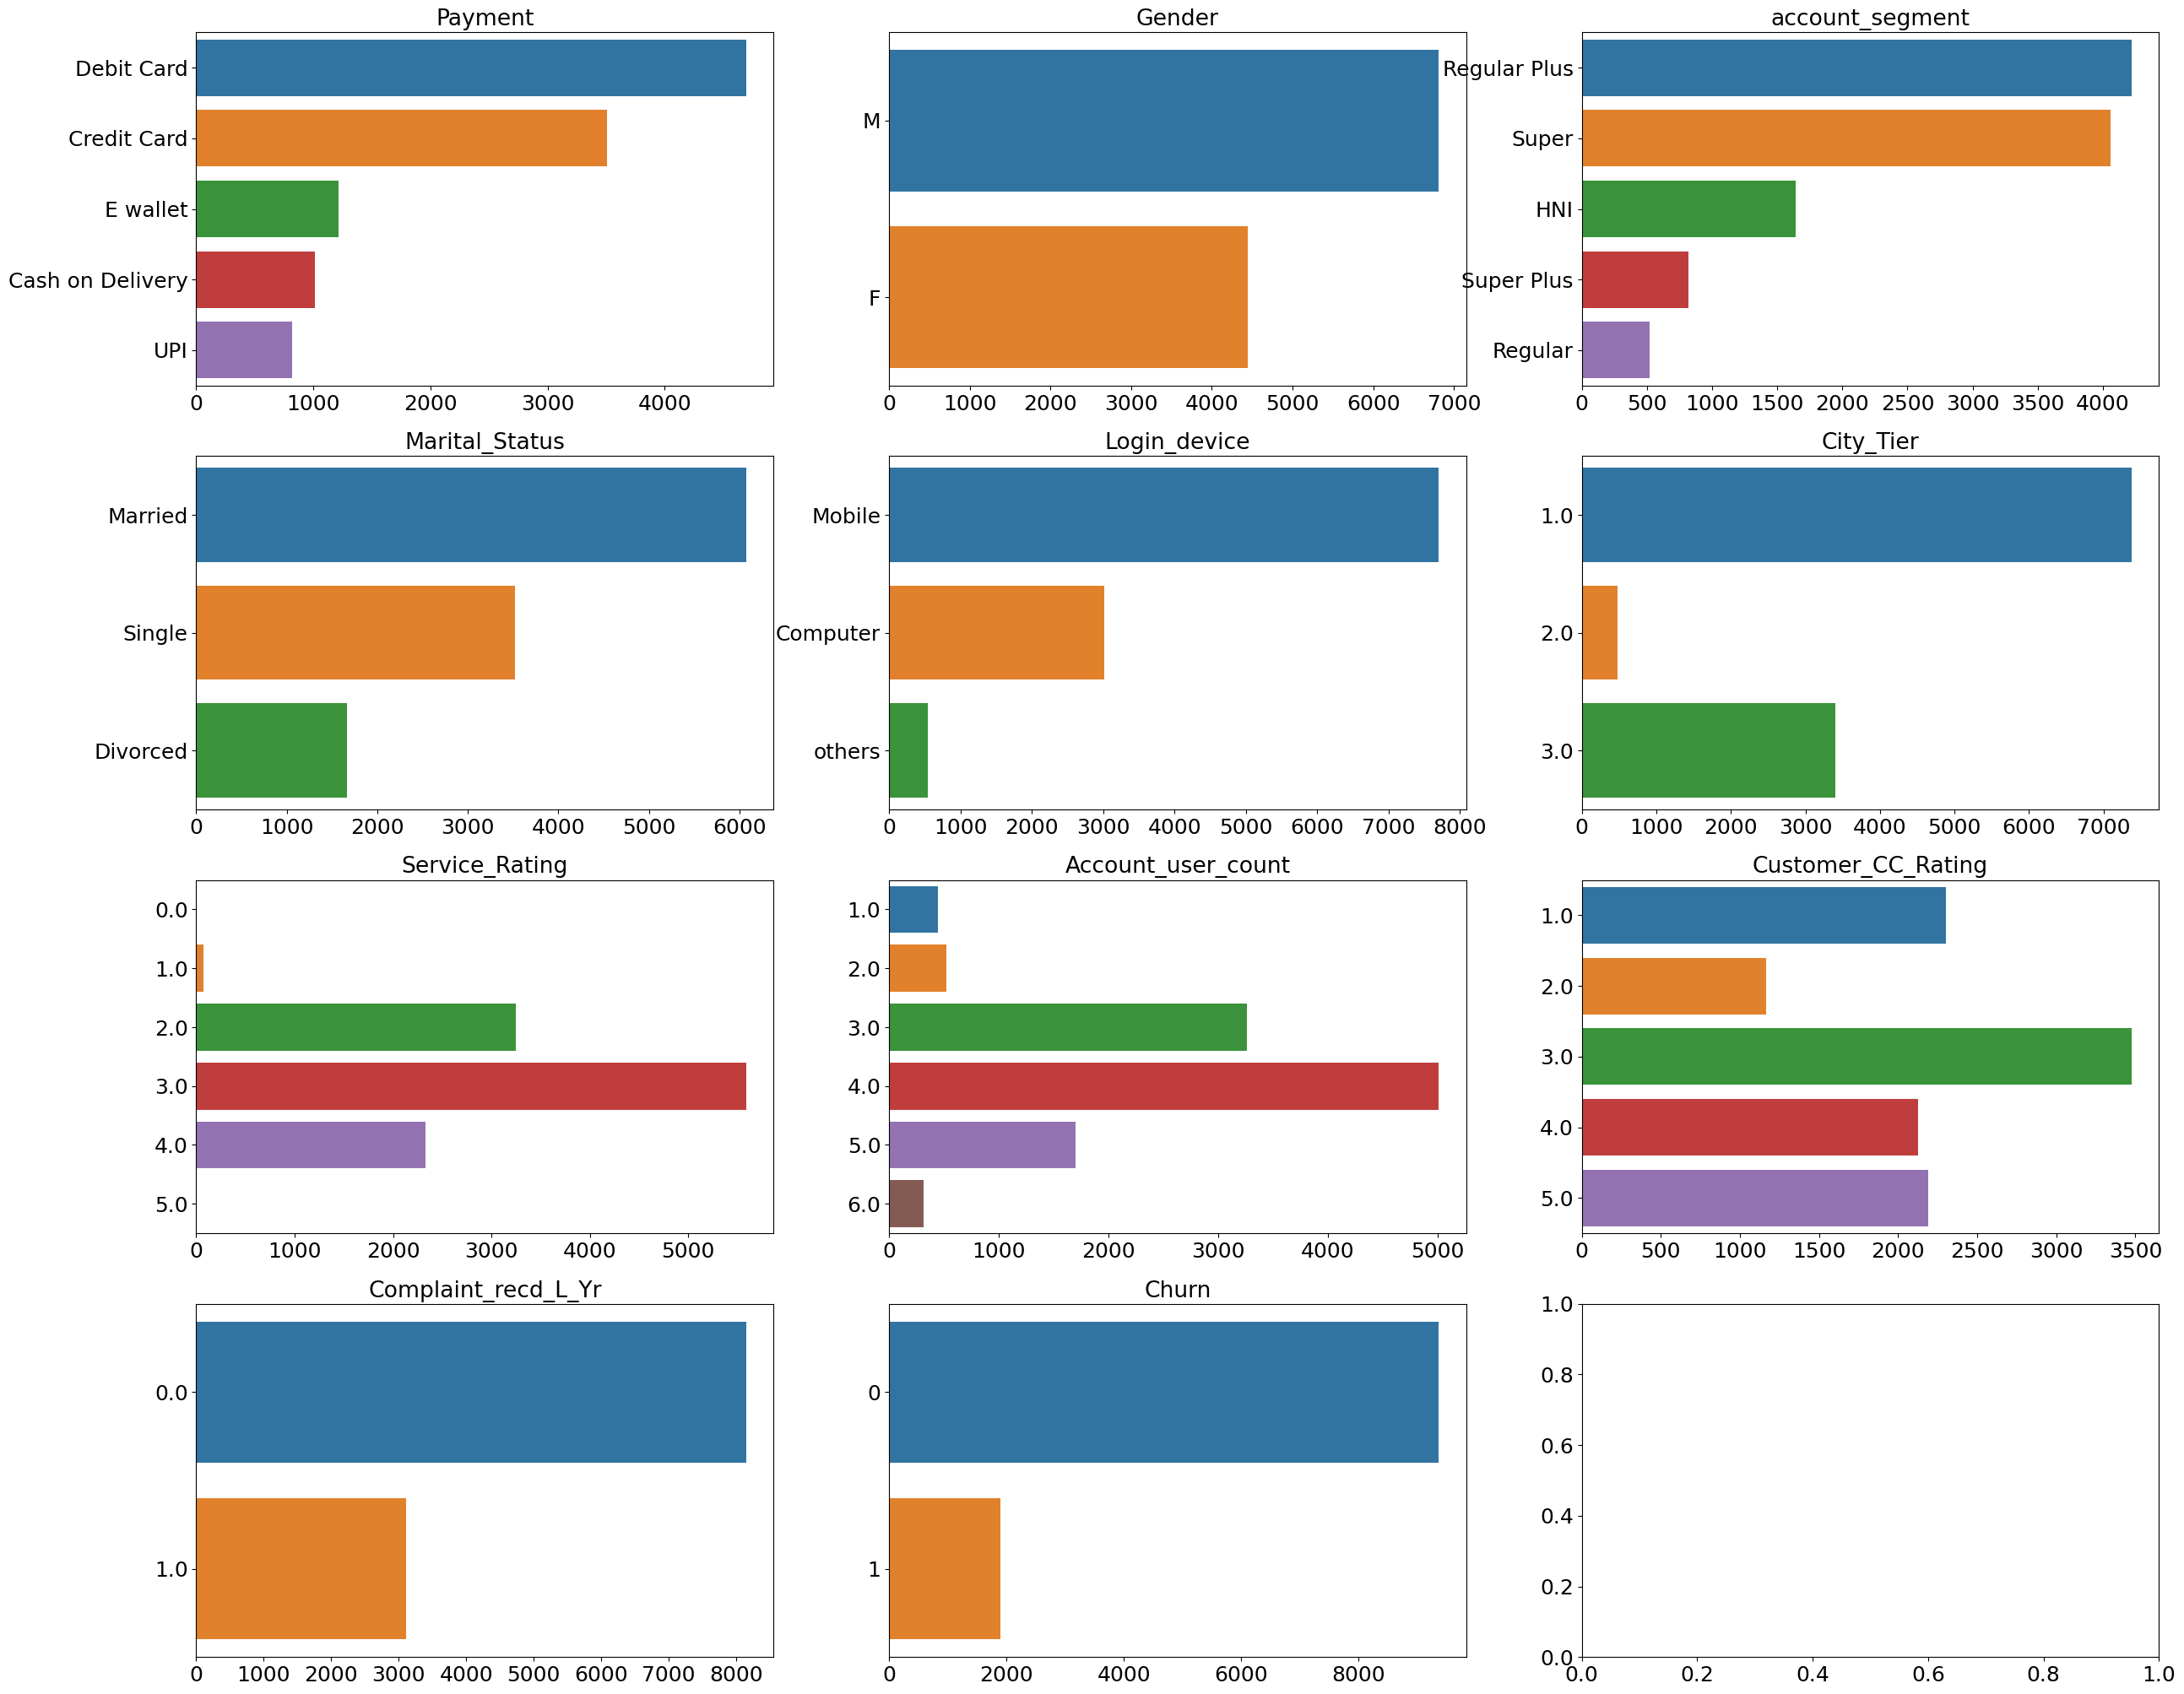

In [ ]:
fig,ax = plt.subplots(nrows=4,ncols=3,figsize=(30,25))
plt.rcParams['font.size'] = '16'
for col,sub_plt in zip(cat_fld, ax.flatten()):
  sns.barplot(x=df[col].value_counts().values, y=df[col].value_counts().index,orient="h",  ax=sub_plt).set(title=col)
plt.show()

From the above bar charts it is observed that:
1. Majority of users are choosing Debit card and Credit Card as their payment mode.
2. Significatly more no. of Male Users are there when compared to Female Users
3. Among all the Account segments available most of the Users belong to the "Regular Plus" and "Super"
4. about 50% of the users are married.
5. Large portion of the users are using "Mobile" as their login device
6. About 99% of the users belong to Tire1 and Tire3 Cities
7. Majority of Users rated the service score as 3/5 which signifies "AVerage"
8. Majority of Users accounts are being used by 4 members



### Bi-variate analsysis (EDA4)

#### Numerical Field Analysis (EDA4)

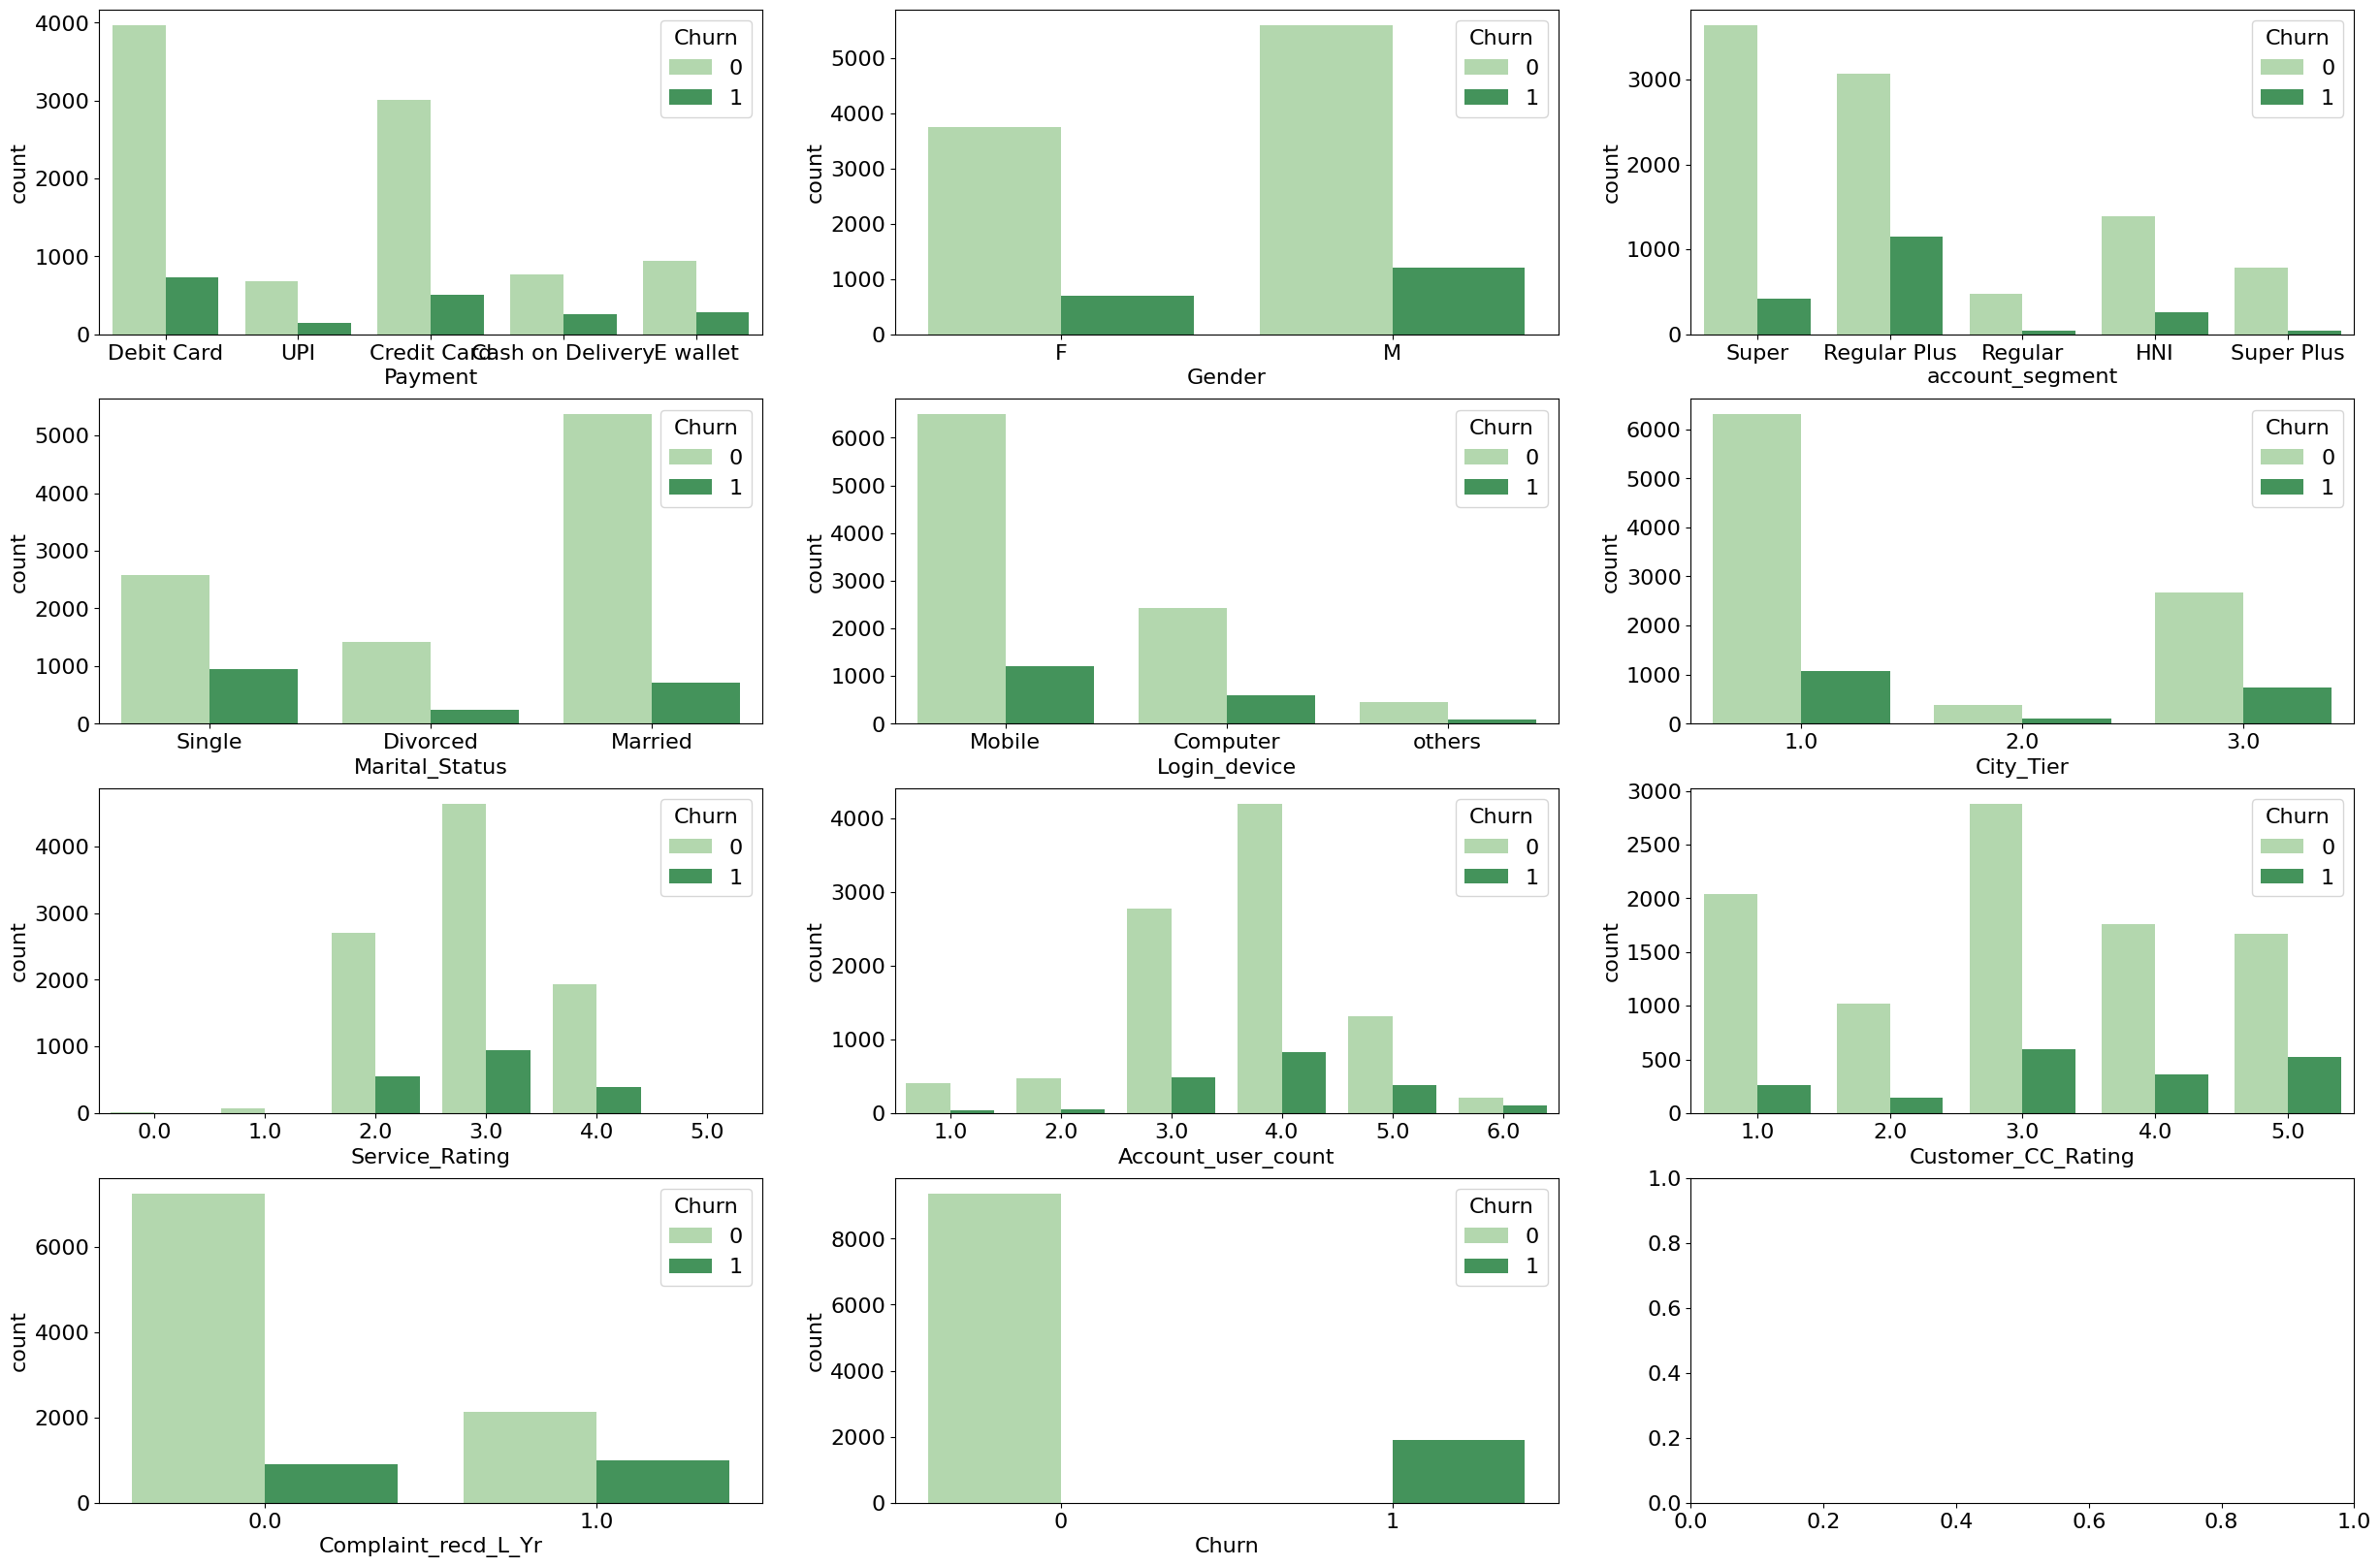

In [ ]:
#Churn rate by category
fig,ax = plt.subplots(nrows=4,ncols=3,figsize=(30,20))
plt.rcParams['font.size'] = '16'
for col,sub_plt in zip(cat_fld, ax.flatten()):
   sns.countplot(x = df[col],  hue=df.Churn,ax=sub_plt, palette = "Greens")
plt.show()

The above plot shows the details of the Churned users:
1. Majority of the Churned users belong to the account segment of "Regular Plus" and "Super"
2. Majority of Churned users used Mobile as their login device
3. Majority of Churned users have given service score as 3/5
4. Majority of Churned user accounts has 4 users per account

#### Categorical variable (EDA5)

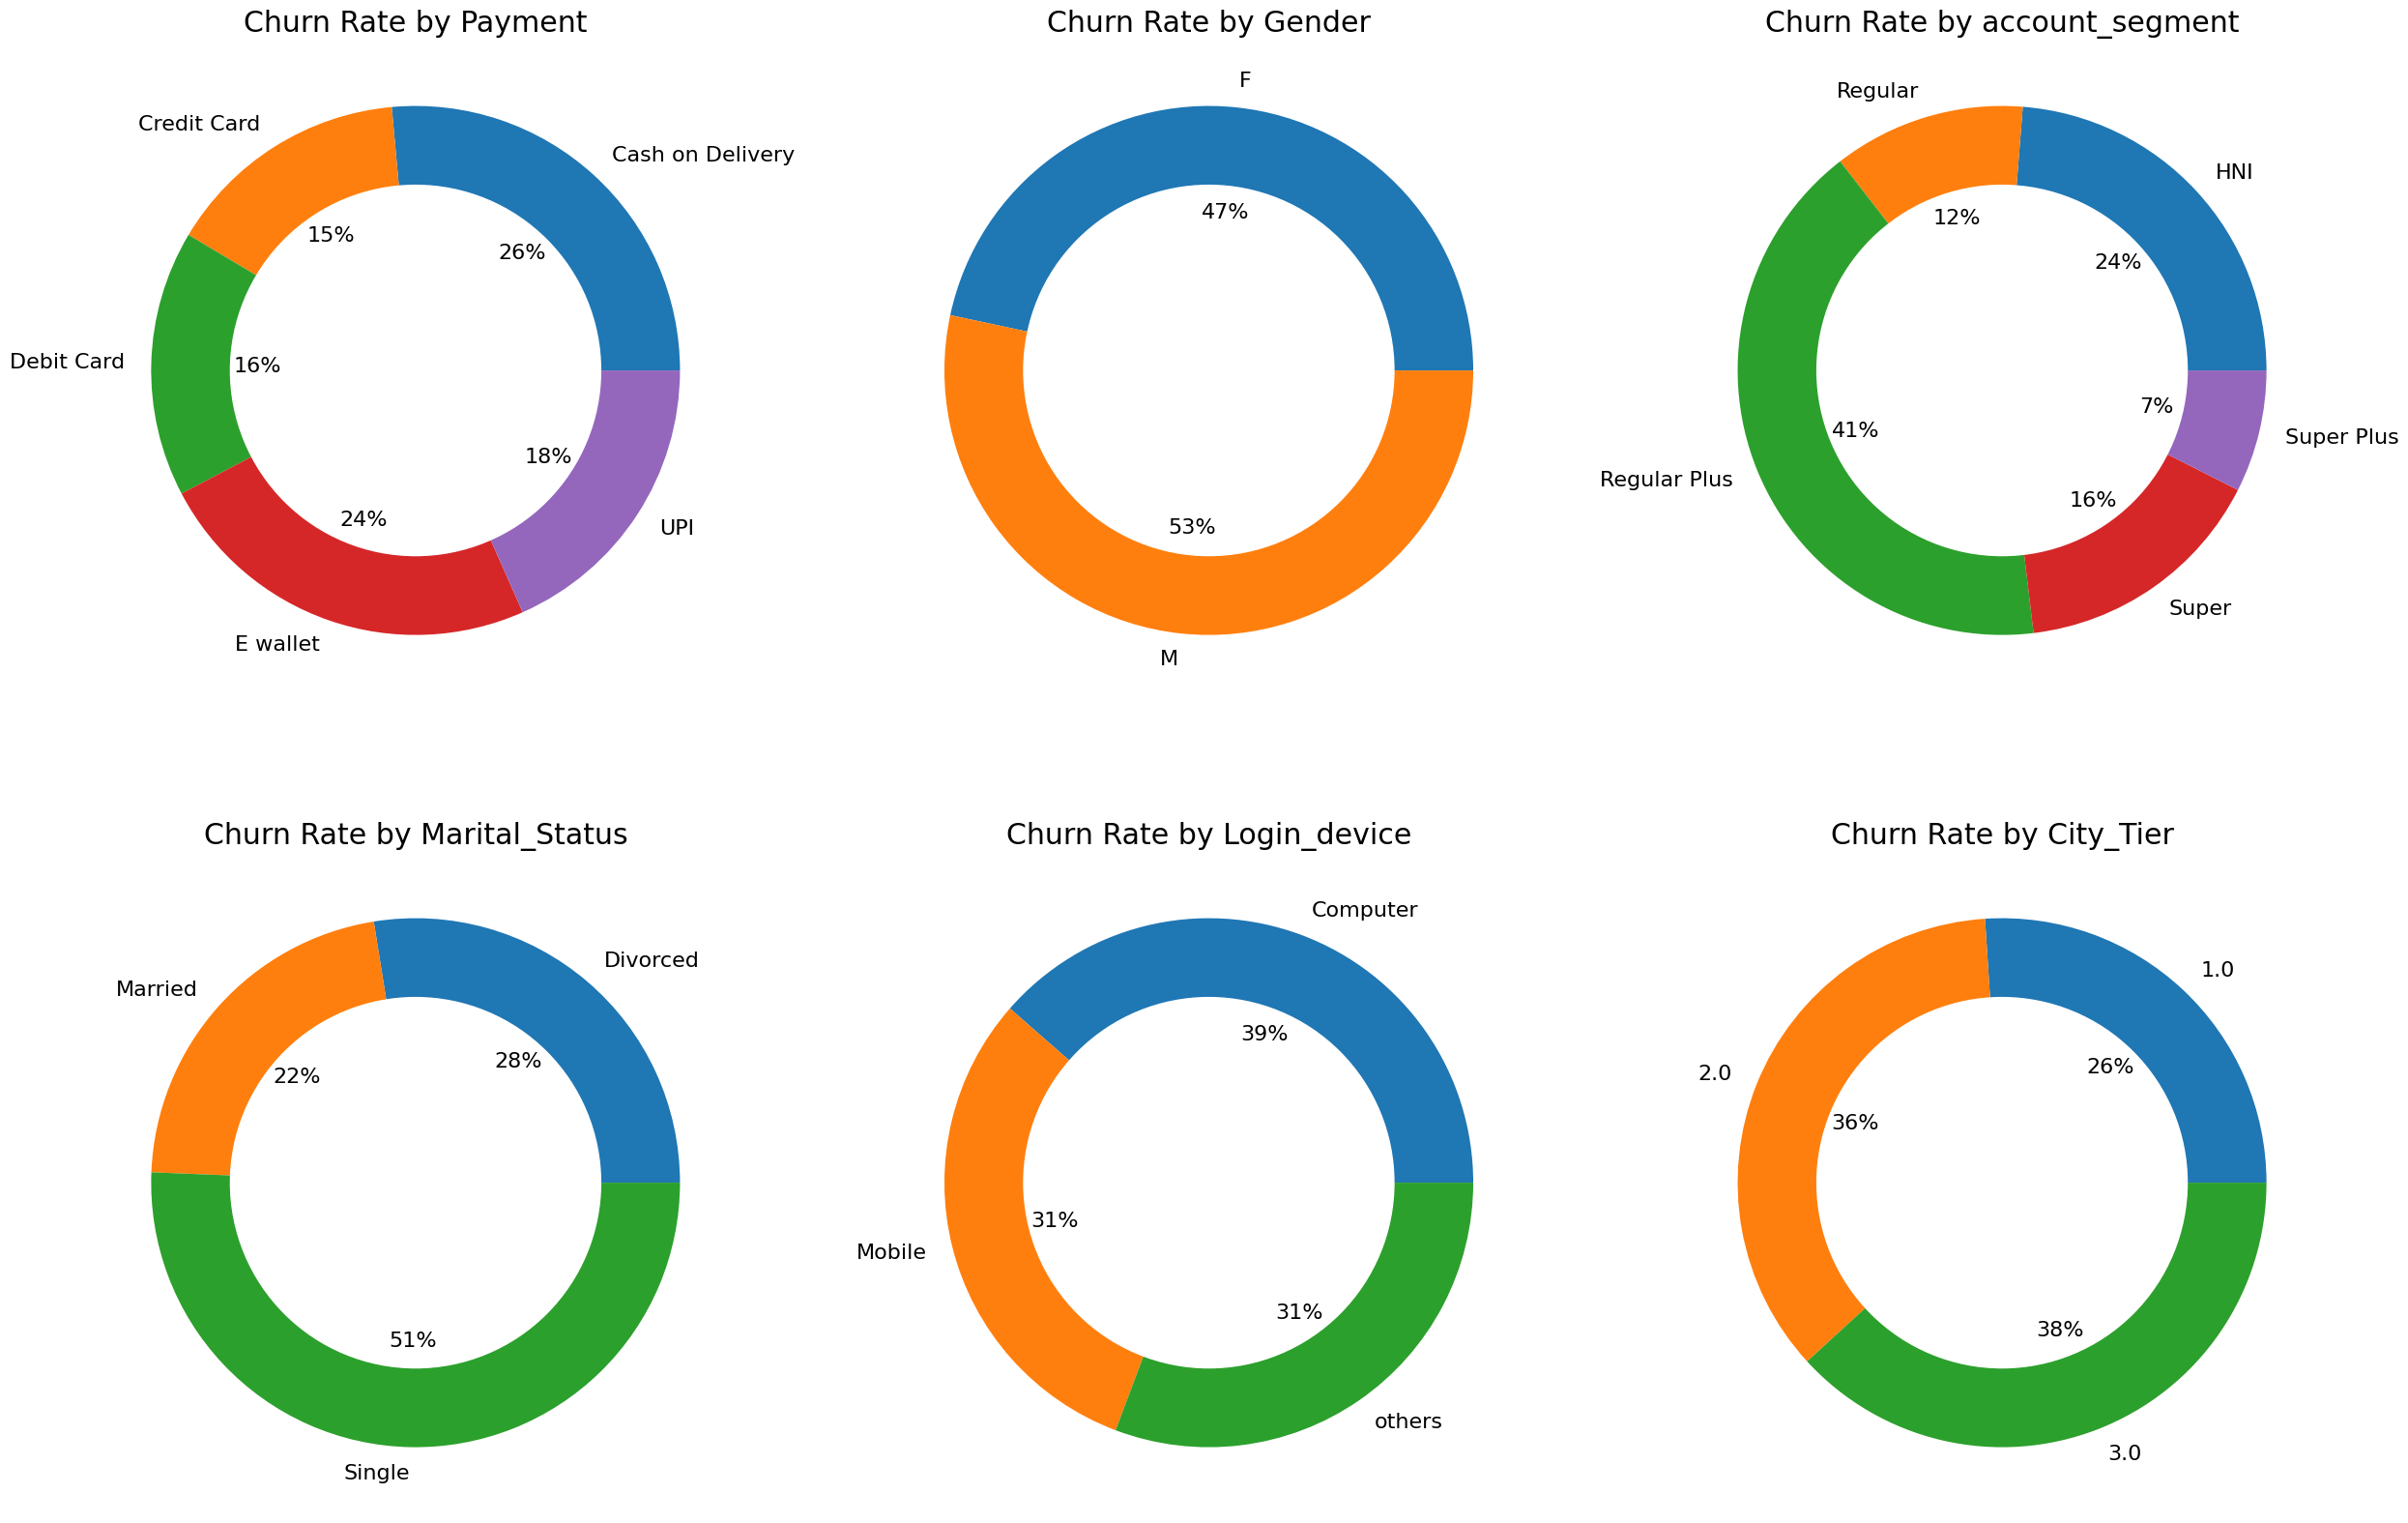

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
plt.rcParams['font.size'] = '18'                            # set the font size to 18
ax[0, 0].set_title("Percentage Churn Rate by Category fields")  # Add title to the first graph

for col, subplot in zip(cat_fld, ax.flatten()):             # loop to iterate over category fields
    sm = df.groupby(by=df[col]).Churn.sum()                 # Calculate percent churn
    tot = df.value_counts(col).sort_index()                 # Calculate total number of customers in each category
    pers = sm/tot*100                                       # Calculate percent churn for each category
    subplot.set_title(f"Churn Rate by {col}")               # Add title to the graph
    wedges, texts, autotexts = subplot.pie(pers.values, labels=pers.index, autopct='%.0f%%', textprops={'fontsize': 16})  # Add pie chart
    center_circle = plt.Circle((0, 0), 0.7, color='white')  # Add a white circle in the center to convert to a doughnut chart
    subplot.add_artist(center_circle)

plt.show()


The above plot represents few observations about the ***Churned users***:
1. Even though all the payment modes are used by users the maximum users used Cash on Deivery as their payment mode (26%)
2. Majority belong to account segment "Regular Plus"(41%) and "HNI" (24%)
3. About 51% has their Marital Status as "Single"
4. The login devices used by churned users are Computer (56%) and Mobile(44%)
5. Tire1 City(26%), Tire2 City(36%), Tire3 City(38%)

### Multivariate Analysis (EDA6)

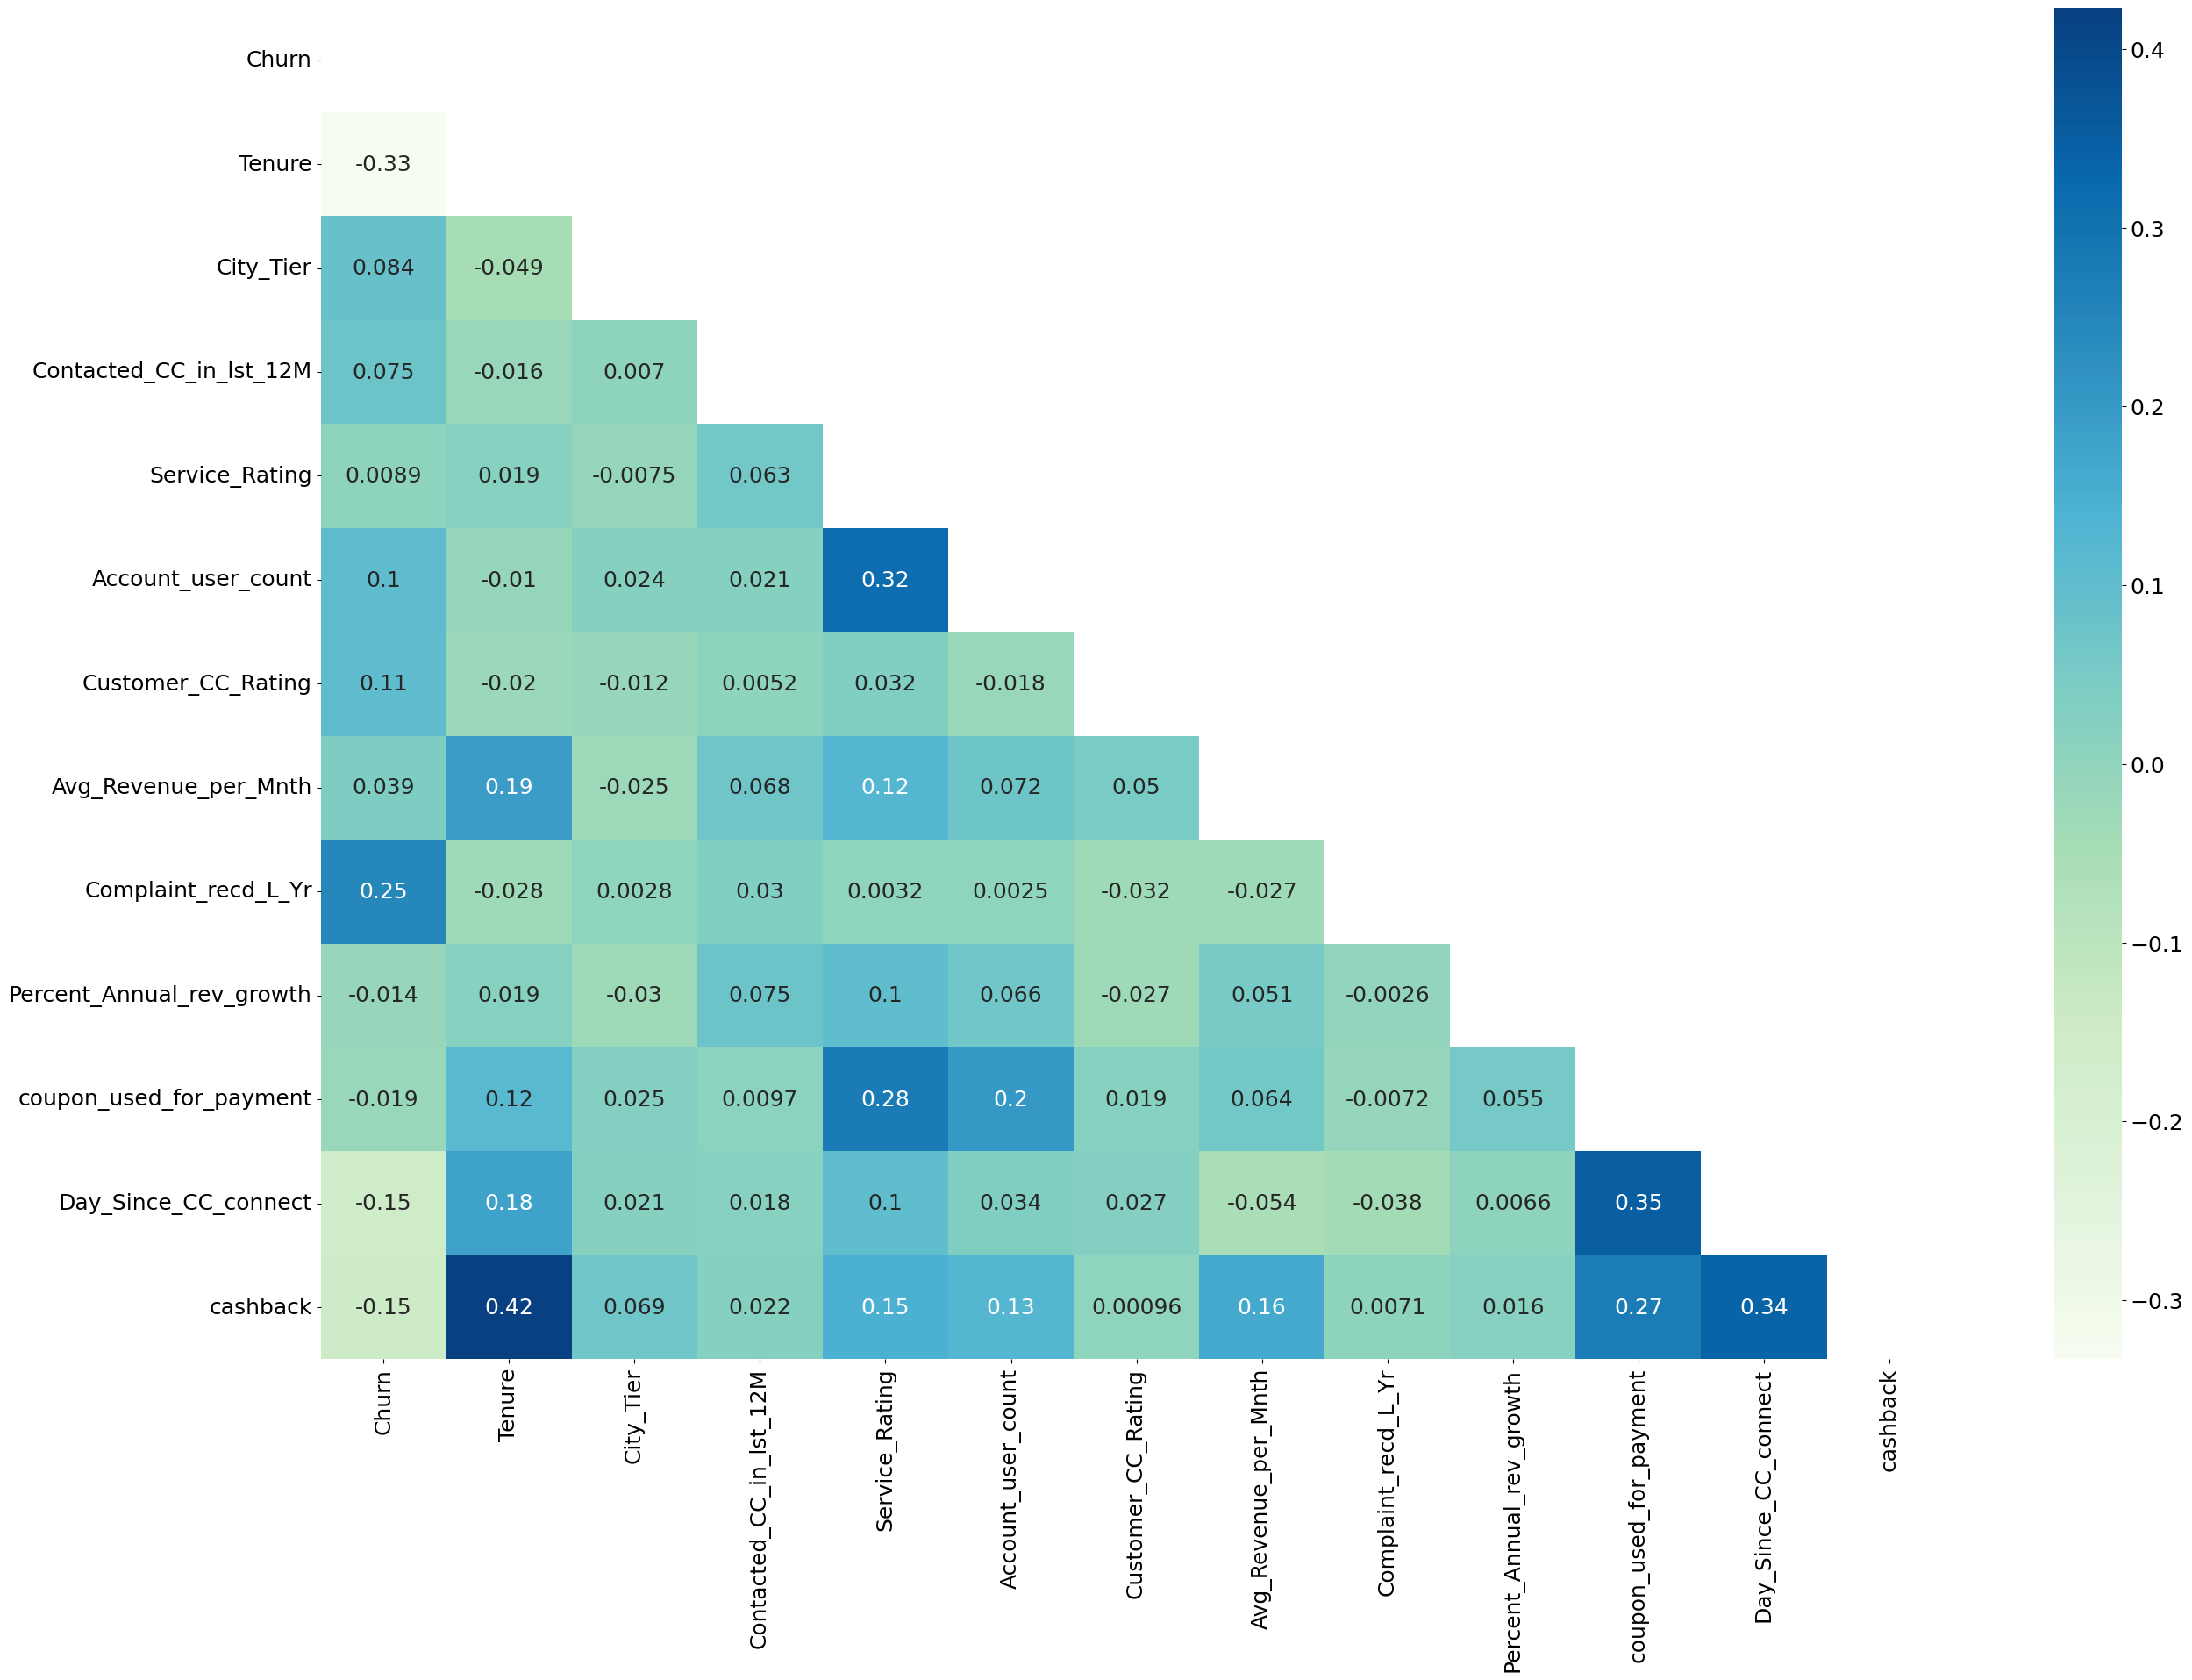

In [ ]:
msk=np.zeros_like(df.corr())                                  #create a 2d arrays of zeros for each feature in dataframe
msk[np.triu_indices_from(msk)] = True                         #split the array diagonally so that we have two part of zeros and ones
fig, ax = plt.subplots( figsize=(30, 20))                     #defining the subplot
#sns.heatmap(df.corr(method='spearman'), mask=msk,  cmap='GnBu', annot=True)    #ploting heatmap
sns.heatmap(df.corr(method='pearson'), mask=msk,  cmap='GnBu', annot=True)    #ploting heatmap
plt.show()

# triu_indices_from: reference <https://numpy.org/doc/stable/reference/generated/numpy.triu_indices_from.html>
# zeros_like: https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html

***The above correlation Plot established:***

Positive Correlation between:
1. Churn - Complain_ly (0.25)
2. Tenure - Cashback (0.42)
3. Servic_Score - Account_User_count (0.32)
4. Coupon_Used_for_payment - Day_Since_CC_connect (0.35)
5. Day_Since_CC_Connect - (0.34)

Negative Correlation between:
1. Churn - Tenure (-0.33)
2. Churn - Day_Since_CC_Connect (-0.15)
3. Churn - Cashback (-0.15)

## Machine Learning (Classification)

*   Importing ML Libraries
*   Data Pre-Processing
*   Model Building
*   Model Evaluation



### 1. Importing ML Libraries (ML1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler


# importing classifiers for model building
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV


import warnings
warnings.filterwarnings("ignore")


from mlxtend.plotting import plot_confusion_matrix



### Data Pre-Processing (ML2)
 * creating dataset copy

In [ ]:
churn_data=df  # Creating dataset for ML operations
churn_data.shape


(11260, 18)

* Label encoding (ML2A)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
churn_data['Payment'] = labelencoder.fit_transform(churn_data['Payment'])
churn_data['Gender'] = labelencoder.fit_transform(churn_data['Gender'])
churn_data['account_segment'] = labelencoder.fit_transform(churn_data['account_segment'])
churn_data['Marital_Status'] = labelencoder.fit_transform(churn_data['Marital_Status'])
churn_data['Login_device'] = labelencoder.fit_transform(churn_data['Login_device'])
churn_data.head(3)

,Churn,Tenure,City_Tier,Contacted_CC_in_lst_12M,Payment,Gender,Service_Rating,Account_user_count,account_segment,Customer_CC_Rating,Marital_Status,Avg_Revenue_per_Mnth,Complaint_recd_L_Yr,Percent_Annual_rev_growth,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,2,0,3.0,3.0,3,2.0,2,9.0,1.0,11.0,1.0,5.0,159.93,1
1,1,0.0,1.0,8.0,4,1,3.0,4.0,2,3.0,2,7.0,1.0,15.0,0.0,0.0,120.90,1
2,1,0.0,1.0,30.0,2,1,2.0,4.0,2,3.0,2,6.0,1.0,14.0,0.0,3.0,196.00,1


*  Dataset Splitting Y - target, X - Predictors (ML2B)

In [ ]:
x=churn_data.drop("Churn", axis=1)
y=churn_data.pop("Churn")

In [ ]:
x.shape

(11260, 17)

In [ ]:
y.shape

(11260,)

### Feature Standardization (ML3)

In [ ]:
x.head()

,Tenure,City_Tier,Contacted_CC_in_lst_12M,Payment,Gender,Service_Rating,Account_user_count,account_segment,Customer_CC_Rating,Marital_Status,Avg_Revenue_per_Mnth,Complaint_recd_L_Yr,Percent_Annual_rev_growth,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.0,3.0,6.0,2,0,3.0,3.0,3,2.0,2,9.0,1.0,11.0,1.0,5.0,159.93,1
1,0.0,1.0,8.0,4,1,3.0,4.0,2,3.0,2,7.0,1.0,15.0,0.0,0.0,120.90,1
2,0.0,1.0,30.0,2,1,2.0,4.0,2,3.0,2,6.0,1.0,14.0,0.0,3.0,196.00,1
3,0.0,3.0,15.0,2,1,2.0,4.0,3,5.0,2,8.0,0.0,23.0,0.0,3.0,134.07,1
4,0.0,1.0,12.0,1,1,2.0,3.0,2,5.0,2,3.0,0.0,11.0,1.0,3.0,129.60,1


In [ ]:
from scipy.stats import zscore


In [ ]:
# Applying Z score
x=x.apply(zscore)
x.head()

,Tenure,City_Tier,Contacted_CC_in_lst_12M,Payment,Gender,Service_Rating,Account_user_count,account_segment,Customer_CC_Rating,Marital_Status,Avg_Revenue_per_Mnth,Complaint_recd_L_Yr,Percent_Annual_rev_growth,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,-0.707765,1.481914,-1.382049,0.236005,-1.237528,0.133748,-0.701928,0.743123,-0.776488,1.268725,1.275330,1.618461,-1.382290,-0.431478,0.112020,-0.427159,0.425732
1,-1.157844,-0.709334,-1.148459,2.220635,0.808063,0.133748,0.293752,-0.150848,-0.047944,1.268725,0.582018,1.618461,-0.317626,-1.338750,-1.323607,-1.321293,0.425732
2,-1.157844,-0.709334,1.421029,0.236005,0.808063,-1.250443,0.293752,-0.150848,-0.047944,1.268725,0.235363,1.618461,-0.583792,-1.338750,-0.462231,0.399165,0.425732
3,-1.157844,1.481914,-0.330895,0.236005,0.808063,-1.250443,0.293752,0.743123,1.409143,1.268725,0.928674,-0.617871,1.811701,-1.338750,-0.462231,-1.019583,0.425732
4,-1.157844,-0.709334,-0.681280,-0.756310,0.808063,-1.250443,-0.701928,-0.150848,1.409143,1.268725,-0.804605,-0.617871,-1.382290,-0.431478,-0.462231,-1.121985,0.425732


### Train Test split 70:30 (ML4)

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [ ]:
x_train.shape

(7882, 17)

In [ ]:
x_test.shape

(3378, 17)

### Model Building (Model : LDA) (ML-5)




In [ ]:
model_lda = LinearDiscriminantAnalysis()
model_LogisReg = LogisticRegression()
model_knn = KNeighborsClassifier()
model_xgb = XGBClassifier()
model_svm = SVC()
model_RandFrst = RandomForestClassifier()

In [ ]:
def get_performance_score(actual, prediction):
  tn, fp, fn, tp= metrics.confusion_matrix(actual,prediction).ravel()
  accuracy = round((tp + tn)/ (tp + fn + tn + fp),3)  # compute accuracy score
  recall=round(tp/(tp+fn), 3)                         # compute recall score
  precision= round(tp/(tp+fp),3)                      # compute precision score
  specificity= round(tn/(tn+fp), 3)                   # compute specificity
  fi_score = round(2*precision*recall/(precision+recall),3)  # compute f1_score
  return  accuracy, recall, precision, specificity, fi_score

In [ ]:
models=[model_lda , model_LogisReg, model_knn, model_xgb, model_svm, model_RandFrst ]
#models= [model_lda, model_LogisReg , model_svm , model_DisTree , model_RandFrst, model_xgb]
model_names= ['Linear discriminant analysis','Logistic Regression', 'K-Nearest Neighbors','XGBClassifier', 'Support Vector Machine', 'Random Forest' ]

In [ ]:
cols = ['Model', 'accuracy', 'recall', 'precision', 	 'specificity', 	 'f1_score']
test_scores = pd.DataFrame(columns = cols)
train_scores = pd.DataFrame(columns = cols)

In [ ]:
test_scores.drop(test_scores.index , inplace=True)
train_scores.drop(train_scores.index, inplace=True)
for model,name in zip(models,model_names):
  model.fit(x_train,y_train)                                                                                   # fit the model using the train data
  #---------------------------------------
  y_pred_train = model.predict(x_train)                                                                        # Predicting Y using train data for comparison
  y_pred_test = model.predict(x_test)                                                                          # Predicting Y using test data
  #---------------------------------------
  # functios applied on test and train data to return accuracy, recall, precision, specifiity and f1 score
  tst_acc, tst_rcll, tst_prec, tst_speci, tst_f1Score= get_performance_score(y_test,y_pred_test)
  tst_modelScore=round(model.score(x_test , y_test),3)                                                          # getting model scores for test
  trn_acc, trn_rcll, trn_prec, trn_speci, trn_f1Score= get_performance_score(y_train,y_pred_train)
  trn_modelScore=round(model.score(x_train, y_train), 3)                                                        # getting model scores for train dataset

  # Adding performace scores for test and train to different dataset for evaluation
  test_scores = test_scores.append({'Model':name, 'accuracy': tst_acc, 'recall':tst_rcll, 'precision':tst_prec,'specificity':tst_speci, 	 'f1_score':tst_f1Score  },ignore_index=True)
  train_scores = train_scores.append({'Model':name, 'accuracy': trn_acc, 'recall':trn_rcll, 'precision':trn_prec,'specificity':trn_speci, 	 'f1_score':trn_f1Score  },ignore_index=True)
  # Printing performance score for each model
  print(f'Using model: {name}')
  print("                 ", "mdl_score","\taccuracy \t recall", "\t precision", "\t specificity","\t f1_score")
  print("Trainning Score: ",  "{:.3f}".format(trn_modelScore) ,"\t", "{:.3f}".format(trn_acc),"\t\t", "{:.3f}".format(trn_rcll), "\t\t","{:.3f}".format(trn_prec),"\t\t", "{:.3f}".format(trn_speci),"\t\t", "{:.3f}".format(trn_f1Score))
  print(f"Test Score:      ", "{:.3f}".format(tst_modelScore), "\t" ,"{:.3f}".format(tst_acc), "\t\t","{:.3f}".format(tst_rcll), "\t\t" ,"{:.3f}".format(tst_prec), "\t\t","{:.3f}".format(tst_speci), "\t\t","{:.3f}".format(tst_f1Score))
  print("_________________________________________________________________________________________________________________")

Using model: Linear discriminant analysis
                  mdl_score 	accuracy 	 recall 	 precision 	 specificity 	 f1_score
Trainning Score:  0.875 	 0.875 		 0.394 		 0.743 		 0.972 		 0.515
Test Score:       0.881 	 0.881 		 0.412 		 0.776 		 0.976 		 0.538
_________________________________________________________________________________________________________________
Using model: Logistic Regression
                  mdl_score 	accuracy 	 recall 	 precision 	 specificity 	 f1_score
Trainning Score:  0.882 	 0.882 		 0.446 		 0.754 		 0.971 		 0.560
Test Score:       0.888 	 0.888 		 0.460 		 0.787 		 0.975 		 0.581
_________________________________________________________________________________________________________________
Using model: K-Nearest Neighbors
                  mdl_score 	accuracy 	 recall 	 precision 	 specificity 	 f1_score
Trainning Score:  0.978 	 0.978 		 0.895 		 0.971 		 0.995 		 0.931
Test Score:       0.957 	 0.957 		 0.807 		 0.931 		 0.988 		 0.865
____

###  Model Evaluation (MLEV)

In [ ]:
df_model_acc= pd.DataFrame()
df_model_acc['Models'] = train_scores['Model']
df_model_acc['Train Accuracy']= round(train_scores['accuracy'],3)
df_model_acc['Test Accuracy']= round(test_scores['accuracy'],3)
df_model_acc.set_index('Models', inplace=True)
df_model_acc



,Train Accuracy,Test Accuracy
Models,,
Linear discriminant analysis,0.875,0.881
Logistic Regression,0.882,0.888
K-Nearest Neighbors,0.978,0.957
XGBClassifier,0.999,0.971
Support Vector Machine,0.944,0.928
Random Forest,1.000,0.972


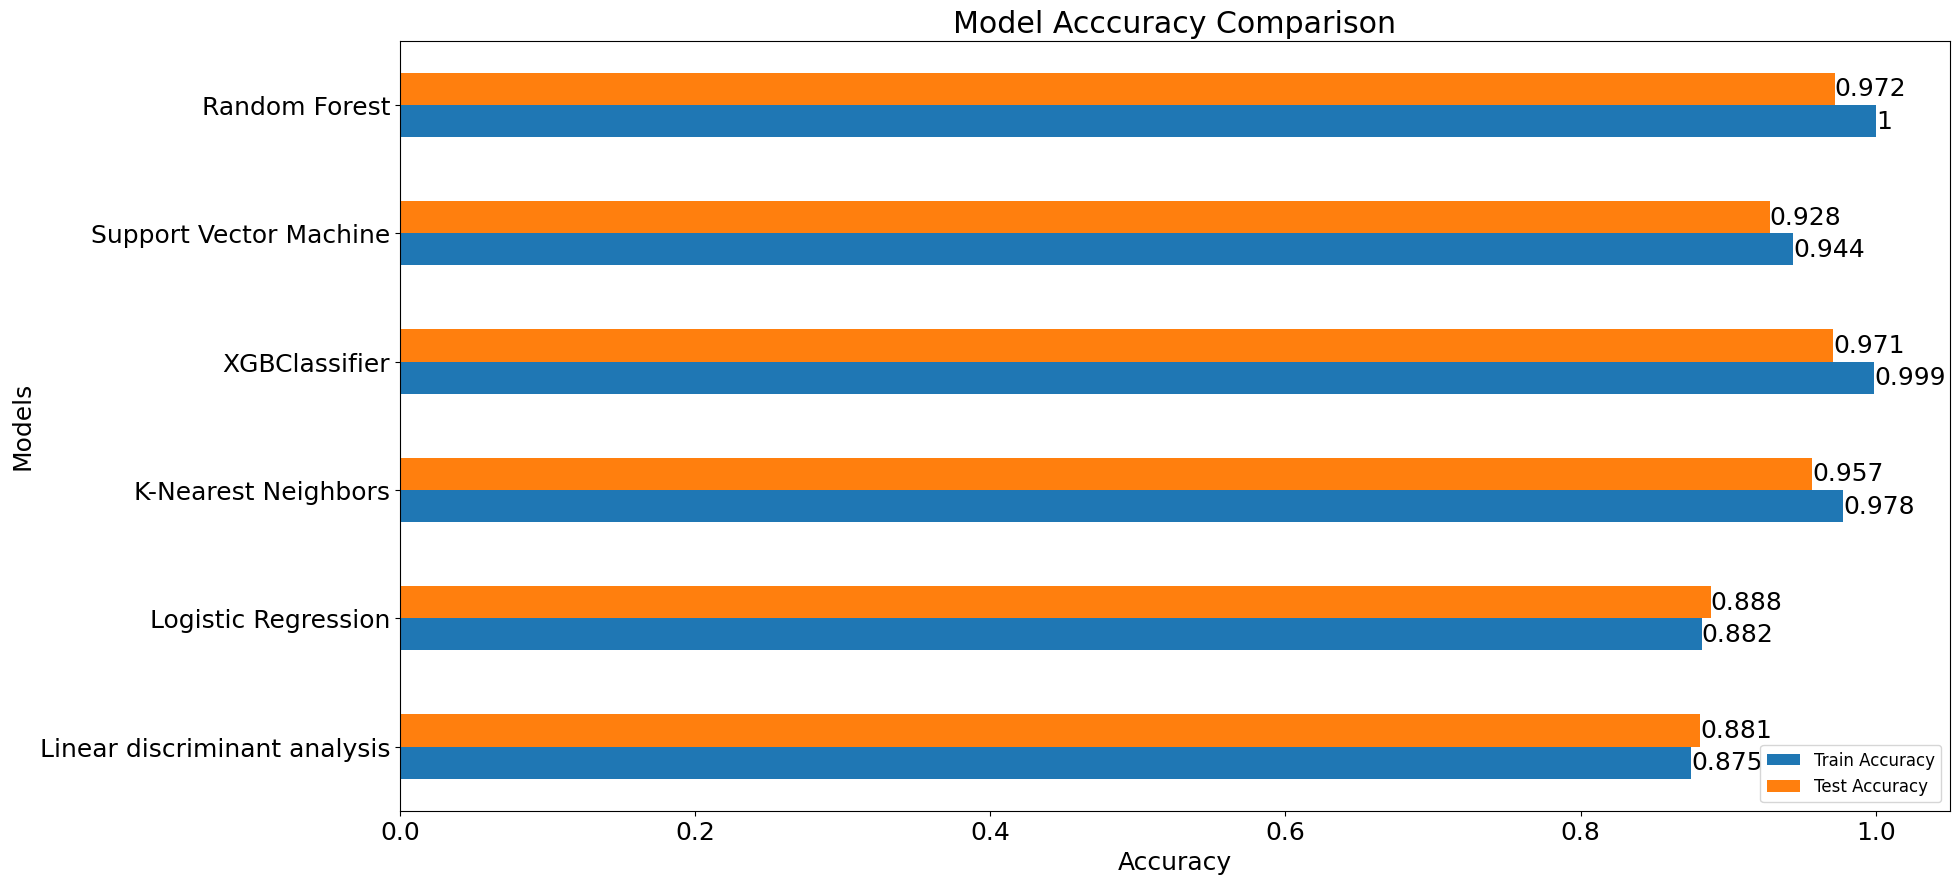

In [ ]:

ax = df_model_acc.plot.barh(title="Model Acccuracy Comparison",
              figsize=(20, 10))
for container in ax.containers:
    ax.bar_label(container)

ax.legend(loc=4, fontsize=12)
ax.set_xlabel("Accuracy")
plt.show()

From the above Graph it is observed that Random Forest, Support Vector Machine(SVM), XGB Classifier, KNN are having higher Test Accuracy compared to Train Accuracy, Whereas Logistic Regression and Linear Discriminant analysis (LDA) are having Train Accuracy and Test Accuracy in line.

In [ ]:
train_scores

,Model,accuracy,recall,precision,specificity,f1_score
0,Linear discriminant analysis,0.875,0.394,0.743,0.972,0.515
1,Logistic Regression,0.882,0.446,0.754,0.971,0.560
2,K-Nearest Neighbors,0.978,0.895,0.971,0.995,0.931
3,XGBClassifier,0.999,0.997,1.000,1.000,0.998
4,Support Vector Machine,0.944,0.710,0.945,0.992,0.811
5,Random Forest,1.000,1.000,1.000,1.000,1.000


In [ ]:
test_scores

,Model,accuracy,recall,precision,specificity,f1_score
0,Linear discriminant analysis,0.881,0.412,0.776,0.976,0.538
1,Logistic Regression,0.888,0.460,0.787,0.975,0.581
2,K-Nearest Neighbors,0.957,0.807,0.931,0.988,0.865
3,XGBClassifier,0.971,0.868,0.954,0.991,0.909
4,Support Vector Machine,0.928,0.616,0.936,0.991,0.743
5,Random Forest,0.972,0.851,0.982,0.997,0.912


From the above Trained and Test Scores it is observed that
1. Accuracy is good For all Models with above 90% accuracy and precision for KNN, XGB Classifier, Support Vector Machine (SVM) and Random Forest.
2. All the models having the Specificity over 95%.
3. KNN, XGB Classifier, Random Forest has higher Recall which is over 80%
4. The F1 score for Random Forest is 91.4% followed by XGB Classifier with 90.9% followed by KNN with 86.5%.
5. As XGB Classifier is the developed version of Random Forest Method. The XGB classifier ML Algorithm is recommended as a Model for predecting the present problem i.e., Customer Churn.

#### Model Evaluation KNN(MLEV1)

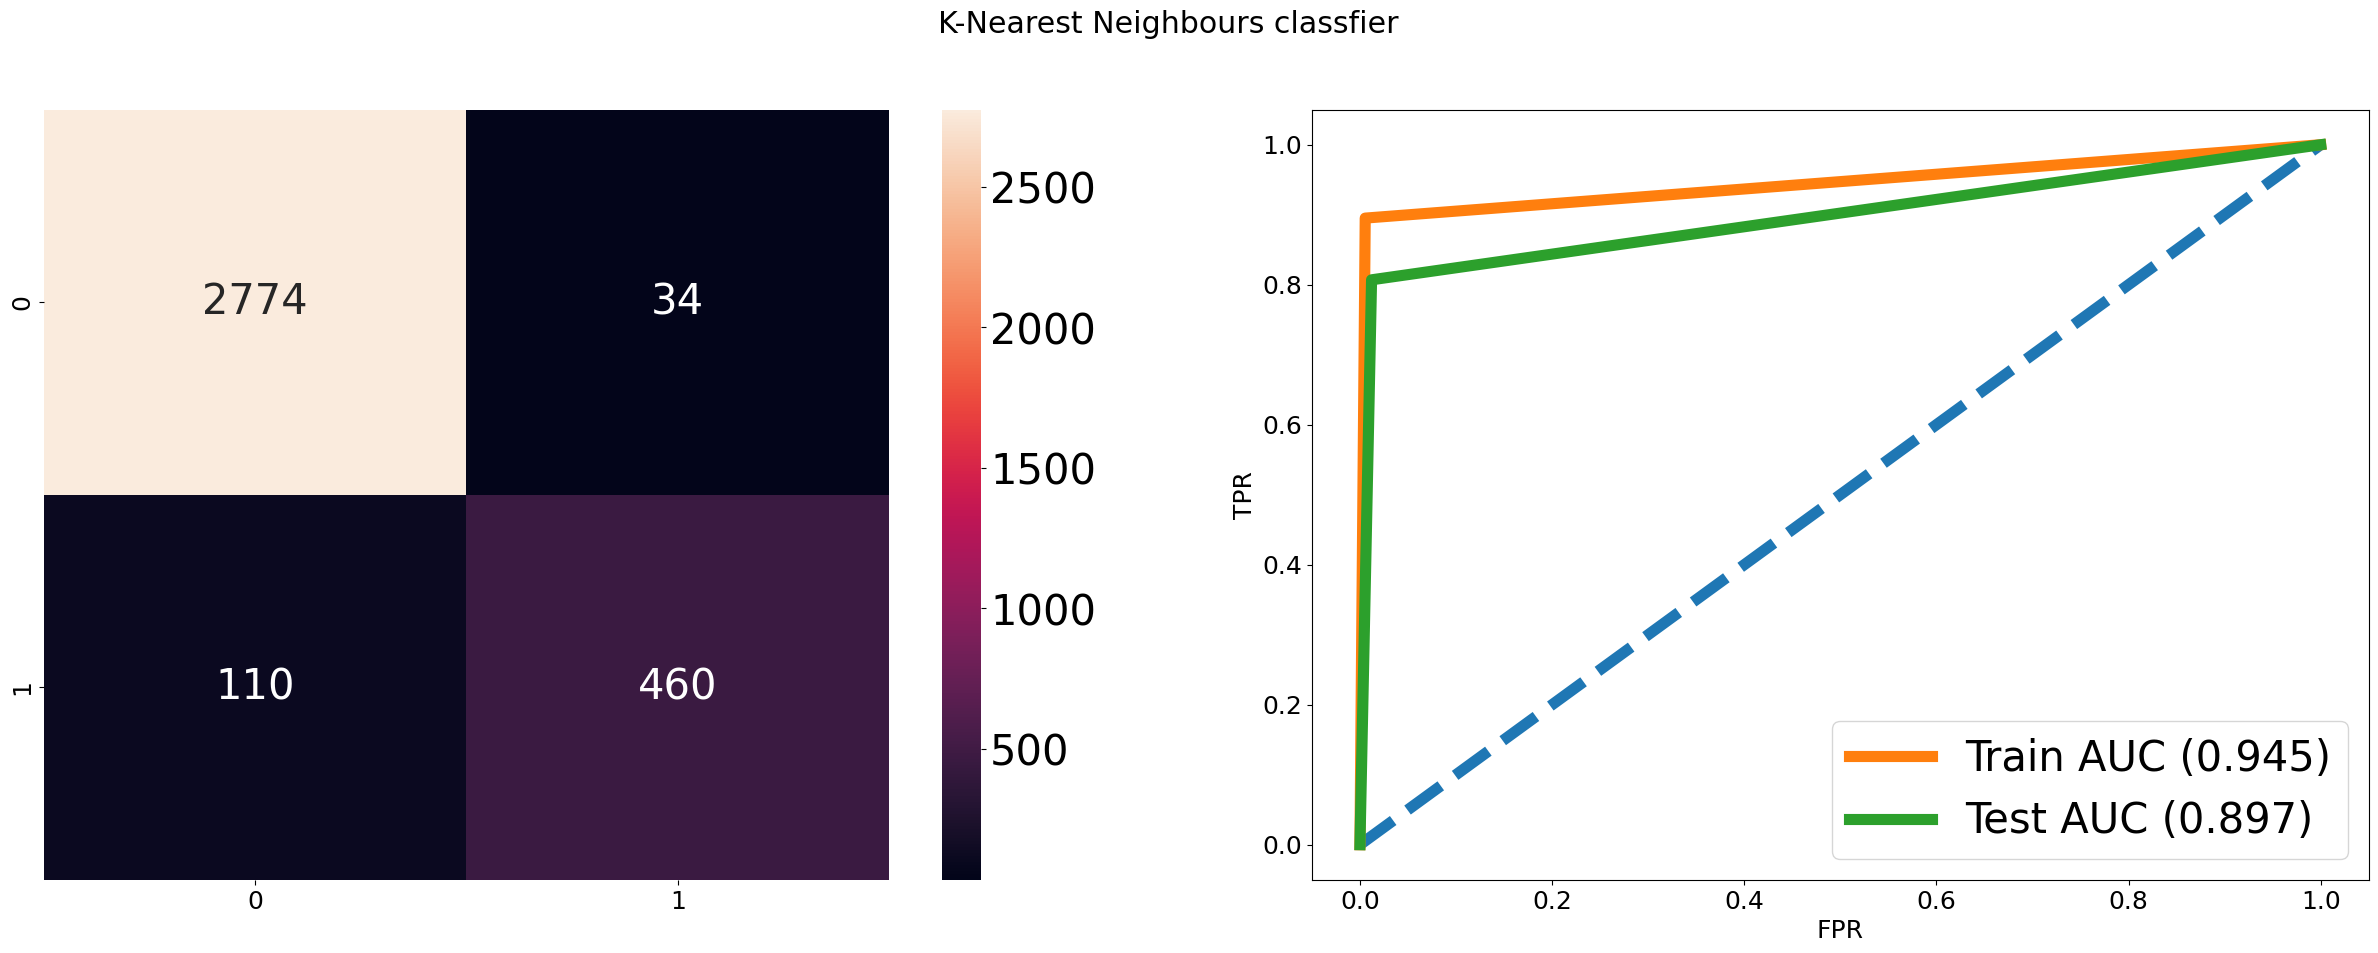

,Scores,accuracy,recall,precision,specificity,f1_score,AUC_score
0,Test,0.957,0.807,0.931,0.988,0.865,0.897455
1,Train,0.978,0.895,0.971,0.995,0.931,0.944841


In [ ]:
rep_df= pd.DataFrame() #Creating dataframe to store test train model performance scores
# Model: K-Nearest Neighbours classfier
model_name="K-Nearest Neighbours classfier"
model= KNeighborsClassifier()                                             # calling the model classifier
model.fit(x_train,y_train)
y_pred_tr = model.predict(x_train)
y_pred_ts = model.predict(x_test)                                             # Predicting the y usuing test data
# accuracy = accuracy_score(y_test, y_pred)
roc_auc1_ts = roc_auc_score(y_test, y_pred_ts)
roc_auc1_tr = roc_auc_score(y_train, y_pred_tr)

tst_acc, tst_rcll, tst_prec, tst_speci, tst_f1Score= get_performance_score(y_test,y_pred_ts)
trn_acc, trn_rcll, trn_prec, trn_speci, trn_f1Score= get_performance_score(y_train,y_pred_tr)


  # Adding performace scores for test and train to different dataset for evaluation
rep_df = rep_df.append({'Scores':'Test', 'accuracy':tst_acc, 'recall':tst_rcll, 'precision':tst_prec, 'specificity':tst_speci, 'f1_score':tst_f1Score, 'AUC_score':roc_auc1_ts },ignore_index=True)
rep_df = rep_df.append({'Scores':'Train', 'accuracy':trn_acc, 'recall':trn_rcll, 'precision':trn_prec, 'specificity':trn_speci,'f1_score':trn_f1Score,  'AUC_score':roc_auc1_tr },ignore_index=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle(model_name)
plt.rcParams['font.size'] = '30'

sns.heatmap(confusion_matrix(y_test, y_pred_ts), fmt="d", annot=True, ax=ax1)
ax2.set(xlabel='FPR', ylabel='TPR')

fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train,y_pred_tr)# [:,1])
fpr_ts, tpr_ts, thresholds_ts = metrics.roc_curve(y_test, y_pred_ts)# [:,1])               #  calculate roc curve
ax2.plot([0, 1], [0, 1], linestyle='--',linewidth = '8')                                          # plot the roc curve for the model
ax2.plot(fpr_tr, tpr_tr, marker='.',linewidth = '8',label = ('Train AUC (%.3f)' % roc_auc1_tr))
ax2.plot(fpr_ts, tpr_ts, marker='.',linewidth = '8',label = ('Test AUC (%.3f)' % roc_auc1_ts))
ax2.legend(loc='lower right')
plt.show()
rep_df


#### Model Evaluation XGBoost(MLEV2)

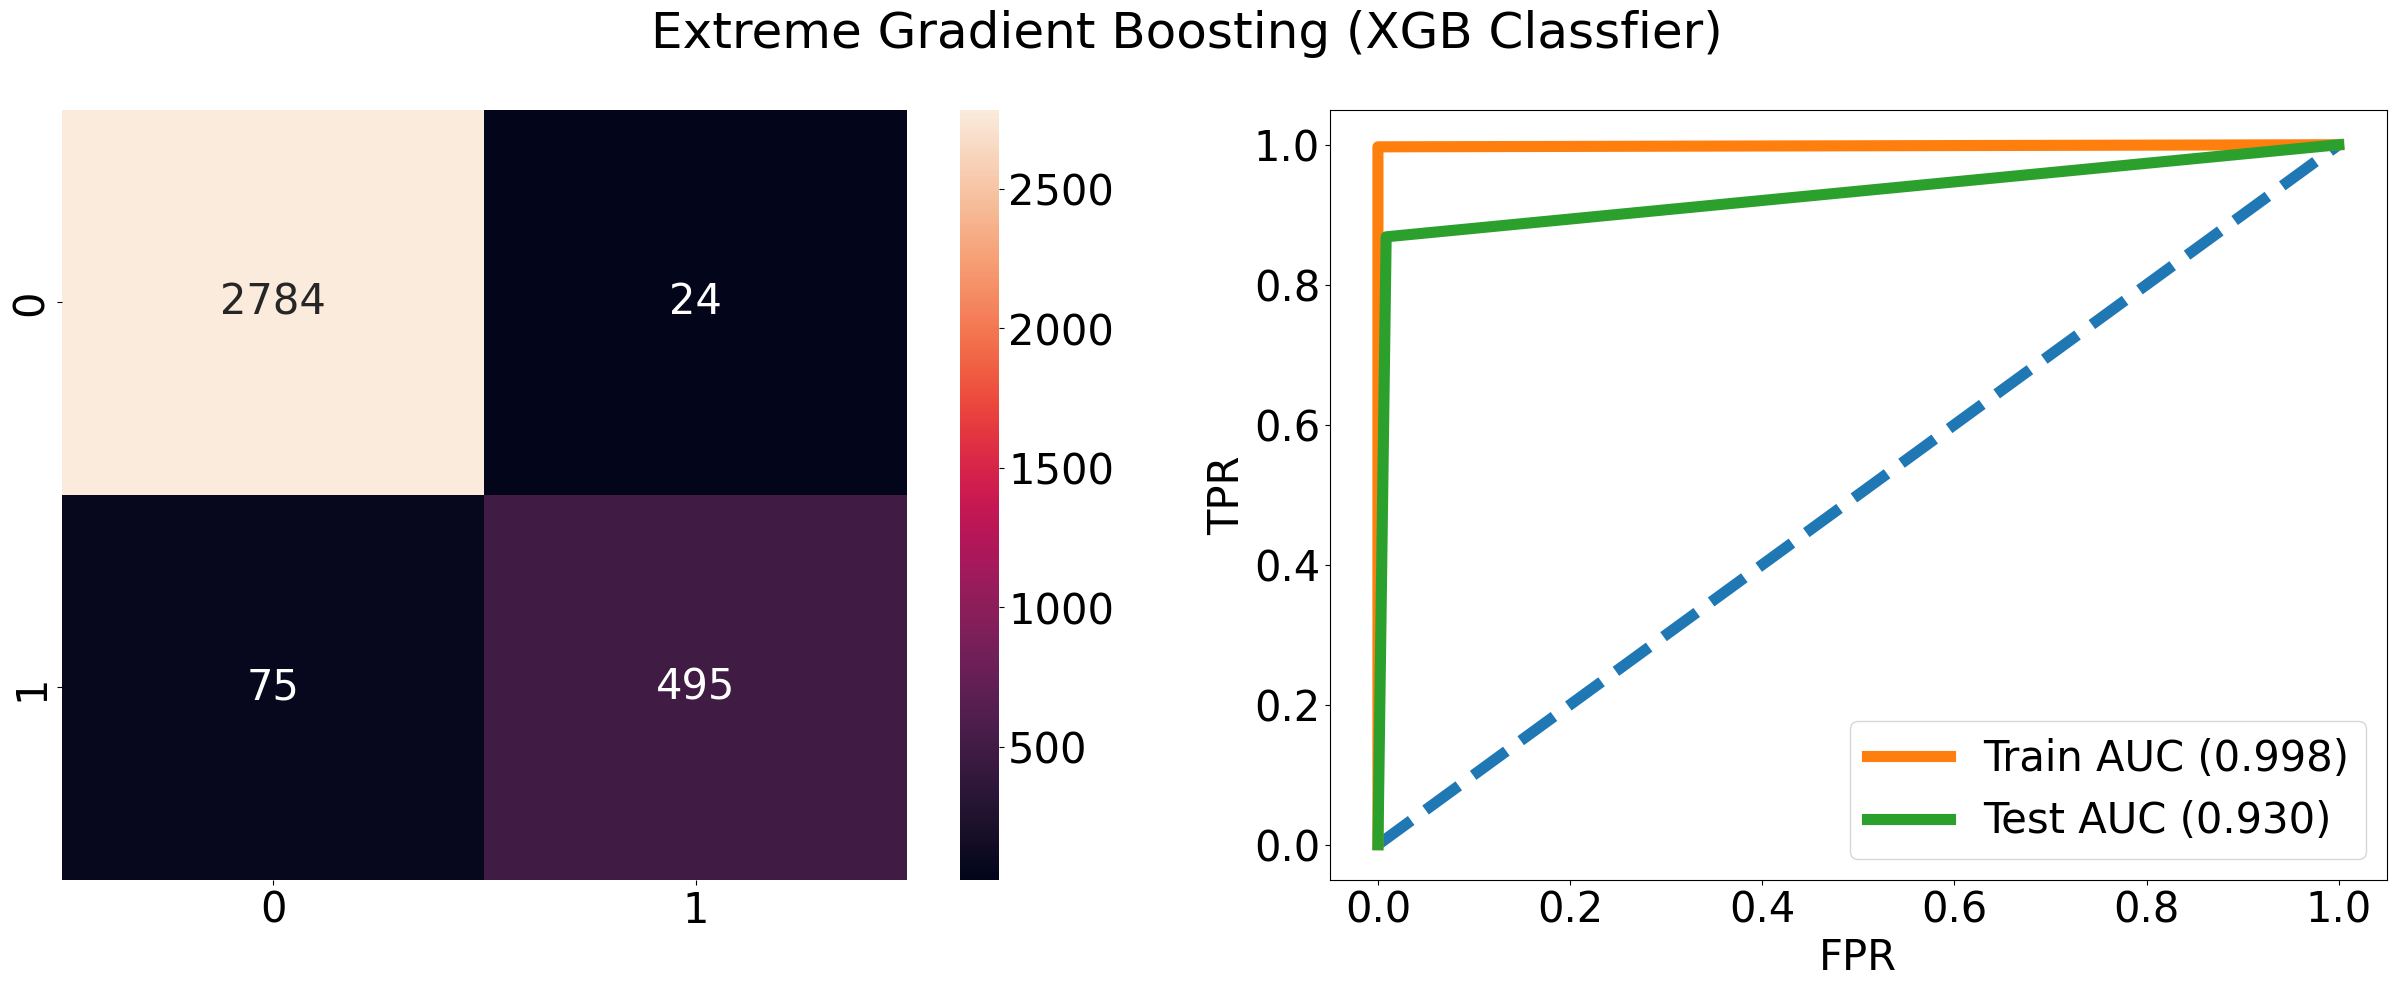

,Scores,accuracy,recall,precision,specificity,f1_score,AUC_score
0,Test,0.971,0.868,0.954,0.991,0.909,0.929937
1,Train,0.999,0.997,1.000,1.000,0.998,0.998492


In [ ]:
rep_df= pd.DataFrame() #Creating dataframe to store test train model performance scores
# Model: K-Nearest Neighbours classfier
model_name="Extreme Gradient Boosting (XGB Classfier)"
model= XGBClassifier()                                             # calling the model classifier
model.fit(x_train,y_train)
y_pred_tr = model.predict(x_train)
y_pred_ts = model.predict(x_test)                                             # Predicting the y usuing test data
# accuracy = accuracy_score(y_test, y_pred)
roc_auc1_ts = roc_auc_score(y_test, y_pred_ts)
roc_auc1_tr = roc_auc_score(y_train, y_pred_tr)

tst_acc, tst_rcll, tst_prec, tst_speci, tst_f1Score= get_performance_score(y_test,y_pred_ts)
trn_acc, trn_rcll, trn_prec, trn_speci, trn_f1Score= get_performance_score(y_train,y_pred_tr)


  # Adding performace scores for test and train to different dataset for evaluation
rep_df = rep_df.append({'Scores':'Test', 'accuracy':tst_acc, 'recall':tst_rcll, 'precision':tst_prec, 'specificity':tst_speci, 'f1_score':tst_f1Score, 'AUC_score':roc_auc1_ts },ignore_index=True)
rep_df = rep_df.append({'Scores':'Train', 'accuracy':trn_acc, 'recall':trn_rcll, 'precision':trn_prec, 'specificity':trn_speci,'f1_score':trn_f1Score,  'AUC_score':roc_auc1_tr },ignore_index=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle(model_name)
plt.rcParams['font.size'] = '30'

sns.heatmap(confusion_matrix(y_test, y_pred_ts), fmt="d", annot=True, ax=ax1)
ax2.set(xlabel='FPR', ylabel='TPR')

fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train,y_pred_tr)# [:,1])
fpr_ts, tpr_ts, thresholds_ts = metrics.roc_curve(y_test, y_pred_ts)# [:,1])               #  calculate roc curve
ax2.plot([0, 1], [0, 1], linestyle='--',linewidth = '8')                                          # plot the roc curve for the model
ax2.plot(fpr_tr, tpr_tr, marker='.',linewidth = '8',label = ('Train AUC (%.3f)' % roc_auc1_tr))
ax2.plot(fpr_ts, tpr_ts, marker='.',linewidth = '8',label = ('Test AUC (%.3f)' % roc_auc1_ts))
ax2.legend(loc='lower right')
plt.show()
rep_df


#### Model Evaluation Support Vector Machine(MLEV3)

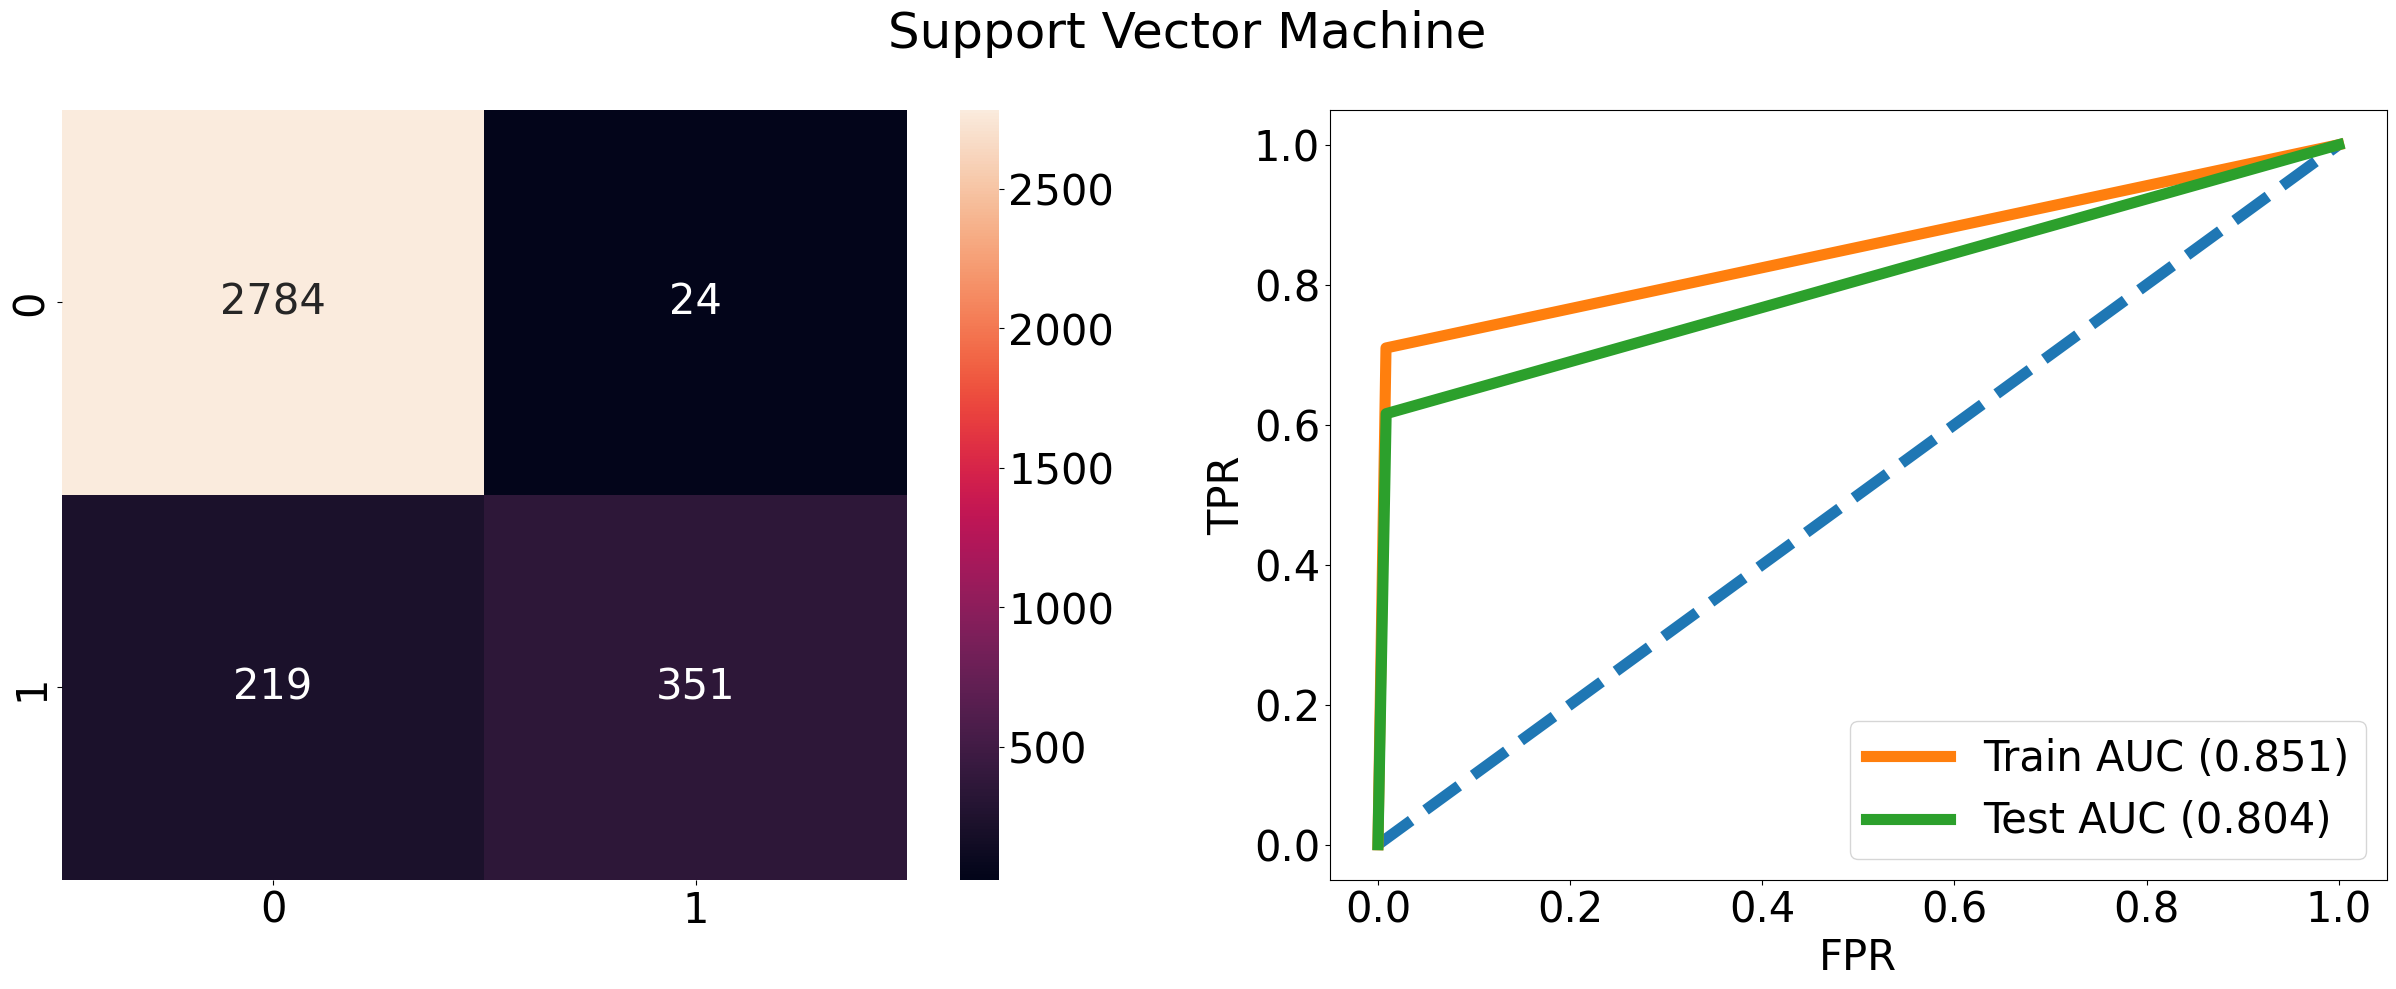

,Scores,accuracy,recall,precision,specificity,f1_score,AUC_score
0,Test,0.928,0.616,0.936,0.991,0.743,0.803621
1,Train,0.944,0.710,0.945,0.992,0.811,0.850632


In [ ]:
rep_df= pd.DataFrame() #Creating dataframe to store test train model performance scores
# Model: Support Vector Machine
model_name="Support Vector Machine"
model= SVC()                                             # calling the model classifier
model.fit(x_train,y_train)
y_pred_tr = model.predict(x_train)
y_pred_ts = model.predict(x_test)                                             # Predicting the y usuing test data
# accuracy = accuracy_score(y_test, y_pred)
roc_auc1_ts = roc_auc_score(y_test, y_pred_ts)
roc_auc1_tr = roc_auc_score(y_train, y_pred_tr)

tst_acc, tst_rcll, tst_prec, tst_speci, tst_f1Score= get_performance_score(y_test,y_pred_ts)
trn_acc, trn_rcll, trn_prec, trn_speci, trn_f1Score= get_performance_score(y_train,y_pred_tr)


  # Adding performace scores for test and train to different dataset for evaluation
rep_df = rep_df.append({'Scores':'Test', 'accuracy':tst_acc, 'recall':tst_rcll, 'precision':tst_prec, 'specificity':tst_speci, 'f1_score':tst_f1Score, 'AUC_score':roc_auc1_ts },ignore_index=True)
rep_df = rep_df.append({'Scores':'Train', 'accuracy':trn_acc, 'recall':trn_rcll, 'precision':trn_prec, 'specificity':trn_speci,'f1_score':trn_f1Score,  'AUC_score':roc_auc1_tr },ignore_index=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle(model_name)
plt.rcParams['font.size'] = '30'

sns.heatmap(confusion_matrix(y_test, y_pred_ts), fmt="d", annot=True, ax=ax1)
ax2.set(xlabel='FPR', ylabel='TPR')

fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train,y_pred_tr)# [:,1])
fpr_ts, tpr_ts, thresholds_ts = metrics.roc_curve(y_test, y_pred_ts)# [:,1])               #  calculate roc curve
ax2.plot([0, 1], [0, 1], linestyle='--',linewidth = '8')                                          # plot the roc curve for the model
ax2.plot(fpr_tr, tpr_tr, marker='.',linewidth = '8',label = ('Train AUC (%.3f)' % roc_auc1_tr))
ax2.plot(fpr_ts, tpr_ts, marker='.',linewidth = '8',label = ('Test AUC (%.3f)' % roc_auc1_ts))
ax2.legend(loc='lower right')
plt.show()
rep_df


#### Model Evaluation Random Forest(MLEV4)

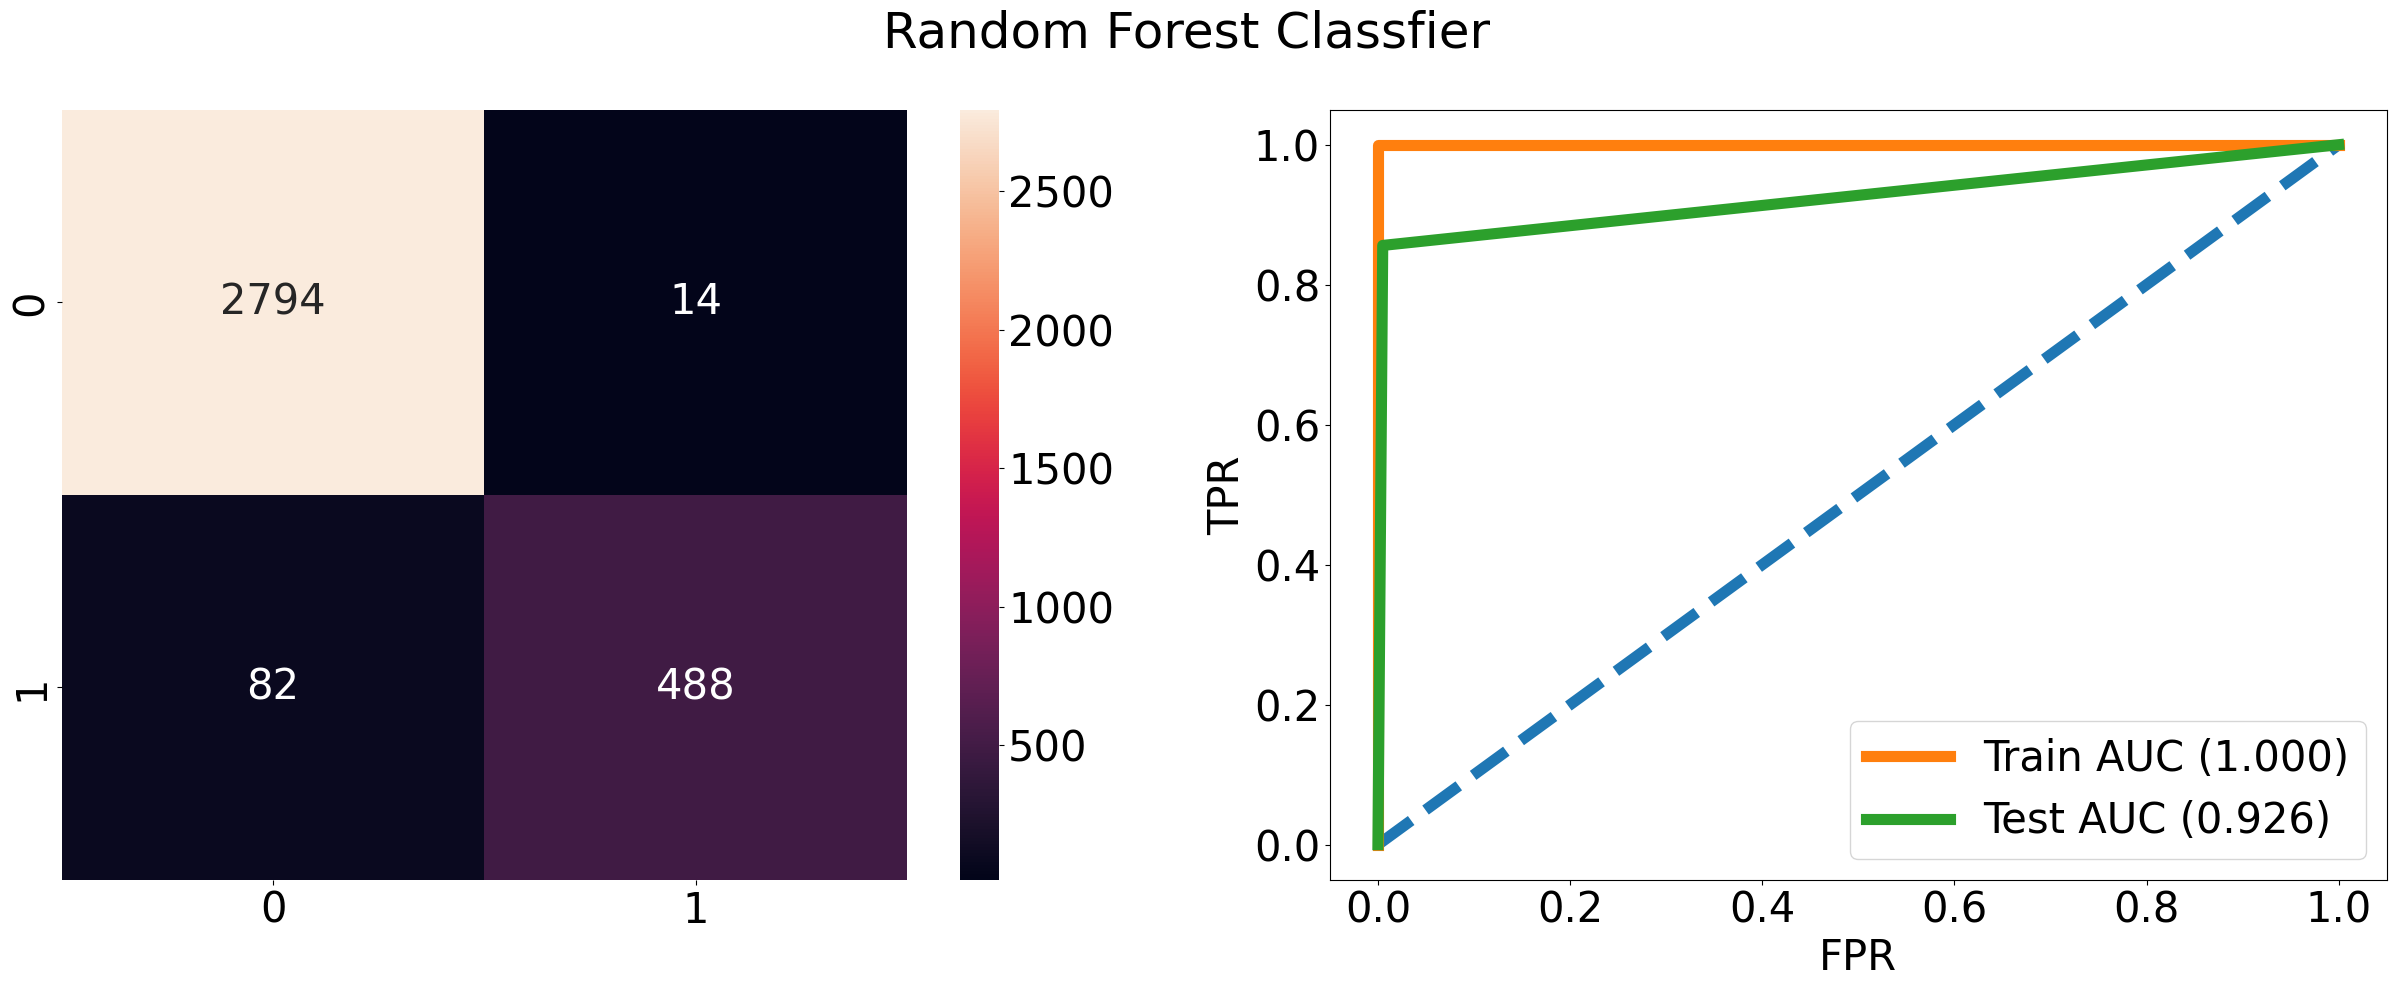

,Scores,accuracy,recall,precision,specificity,f1_score,AUC_score
0,Test,0.972,0.856,0.972,0.995,0.91,0.925577
1,Train,1.000,1.000,1.000,1.000,1.00,1.000000


In [ ]:
rep_df= pd.DataFrame() #Creating dataframe to store test train model performance scores
# Model: Random Forest Classfier
model_name="Random Forest Classfier"
model= RandomForestClassifier()                                             # calling the model classifier
model.fit(x_train,y_train)
y_pred_tr = model.predict(x_train)
y_pred_ts = model.predict(x_test)                                             # Predicting the y usuing test data
# accuracy = accuracy_score(y_test, y_pred)
roc_auc1_ts = roc_auc_score(y_test, y_pred_ts)
roc_auc1_tr = roc_auc_score(y_train, y_pred_tr)

tst_acc, tst_rcll, tst_prec, tst_speci, tst_f1Score= get_performance_score(y_test,y_pred_ts)
trn_acc, trn_rcll, trn_prec, trn_speci, trn_f1Score= get_performance_score(y_train,y_pred_tr)


  # Adding performace scores for test and train to different dataset for evaluation
rep_df = rep_df.append({'Scores':'Test', 'accuracy':tst_acc, 'recall':tst_rcll, 'precision':tst_prec, 'specificity':tst_speci, 'f1_score':tst_f1Score, 'AUC_score':roc_auc1_ts },ignore_index=True)
rep_df = rep_df.append({'Scores':'Train', 'accuracy':trn_acc, 'recall':trn_rcll, 'precision':trn_prec, 'specificity':trn_speci,'f1_score':trn_f1Score,  'AUC_score':roc_auc1_tr },ignore_index=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle(model_name)
plt.rcParams['font.size'] = '30'

sns.heatmap(confusion_matrix(y_test, y_pred_ts), fmt="d", annot=True, ax=ax1)
ax2.set(xlabel='FPR', ylabel='TPR')

fpr_tr, tpr_tr, thresholds_tr = metrics.roc_curve(y_train,y_pred_tr)# [:,1])
fpr_ts, tpr_ts, thresholds_ts = metrics.roc_curve(y_test, y_pred_ts)# [:,1])               #  calculate roc curve
ax2.plot([0, 1], [0, 1], linestyle='--',linewidth = '8')                                          # plot the roc curve for the model
ax2.plot(fpr_tr, tpr_tr, marker='.',linewidth = '8',label = ('Train AUC (%.3f)' % roc_auc1_tr))
ax2.plot(fpr_ts, tpr_ts, marker='.',linewidth = '8',label = ('Test AUC (%.3f)' % roc_auc1_ts))
ax2.legend(loc='lower right')
plt.show()
rep_df


### Cross Validation (MLCV)


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score

xgb_model = XGBClassifier()

# Perform Stratified k-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(xgb_model, x, y, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

# Calculate AUC for cross-validation
auc_scores = cross_val_score(xgb_model, x, y, cv=kfold, scoring='roc_auc')
print("AUC Scores:", auc_scores)
print("Mean AUC:", auc_scores.mean())
print("Standard Deviation of AUC:", auc_scores.std())

Cross-Validation Scores: [0.96536412 0.97646536 0.97424512 0.97424512 0.97380107]
Mean Accuracy: 0.9728241563055061
Standard Deviation: 0.003844557872453515
AUC Scores: [0.99196328 0.99338045 0.99426653 0.98879508 0.99192947]
Mean AUC: 0.9920669643244633
Standard Deviation of AUC: 0.0018600104737306292


#### Hyper Parameter Tuning (MLHPT)


In [ ]:
# Defining the models
models = {
    'KNN': KNeighborsClassifier(),
    'RF': RandomForestClassifier(),
    'SVM': SVC(),
    'XGB': XGBClassifier()
    }

### Declaring parameters for the models (MLHPT1)

In [ ]:
# defining the hyper parameter for different models
params = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
        },
    'RF': {
        'n_estimators': [10, 101, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 6],
        },
    'SVM': {
        #'kernel': ['poly', 'rbf', 'sigmoid'],
        'kernel': ['rbf'],
        'C': [0.1, 1, 10],
        #'gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001]
        'gamma': [ 0.1, 0.01, 0.001]
        },

    'XGB': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 9],
       }
    }

In [ ]:
#Defining the evaluation metrics
metrics = {
    'accuracy': accuracy_score,
    'f1': f1_score,
    'roc_auc': roc_auc_score }

results = {}                 # result dictonary to store the results

### Hyper Parameter turning with different parameters (MLHPT2)

In [ ]:

for name, model in models.items():
  print(f'Tuning {name}…') # Print the model name
  # Create a GridSearchCV object
  grid = GridSearchCV(model, params[name], cv=5, scoring='roc_auc', n_jobs=-1, verbose=1) # Number of folds =5 and scoring type is AUC ROC
  # Fit the grid on the training data
  grid.fit(x_train, y_train)

  # Predict on the test data
  y_pred = grid.predict(x_test)
  # Evaluate the performance and storing resulsts
  scores = {}
  for metric, func in metrics.items():
        scores[metric] = func(y_test, y_pred)

  # Store the results to the dictonary
  results[name] = {
    'best_params': grid.best_params_,
    'best_score': grid.best_score_,
    'test_scores': scores
}


Tuning KNN…
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Tuning RF…
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Tuning SVM…
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tuning XGB…
Fitting 5 folds for each of 48 candidates, totalling 240 fits


#### Getting best estimators and scores from the grid (MLHPT3)

In [ ]:
HPT_scores=pd.DataFrame()                                 # Dataset for storing results for evaluation
for name, result in results.items():
  print(f'{name}:')
  print(f'Best parameters: {result["best_params"]}')
  print(f'Best cross-validation score: {result["best_score"]:.4f}')
  print(f'Test scores:')
  for metric, score in result['test_scores'].items():
    print(f'{metric}: {score:.4f}')
   # print()
  print('_________________________________________________________________________________')
  HPT_scores=HPT_scores.append({"Model_name":name,
                    "Best_Score":round(result["best_score"],4),
                    "accuracy":round((result['test_scores']['accuracy']),4),
                    "f1_score":round((result['test_scores']['f1']),4),
                    "roc_auc":round((result['test_scores']['roc_auc']),4)},
                   ignore_index=True)

KNN:
Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score: 0.9876
Test scores:
accuracy: 0.9772
f1: 0.9297
roc_auc: 0.9436
_________________________________________________________________________________
RF:
Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 200}
Best cross-validation score: 0.9273
Test scores:
accuracy: 0.9082
f1: 0.6623
roc_auc: 0.7588
_________________________________________________________________________________
SVM:
Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.9842
Test scores:
accuracy: 0.9769
f1: 0.9301
roc_auc: 0.9505
_________________________________________________________________________________
XGB:
Best parameters: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300}
Best cross-validation score: 0.9873
Test scores:
accuracy: 0.9790
f1: 0.9348
roc_auc: 0.9447
___________________________________________________________________

In [ ]:
HPT_scores

,Model_name,Best_Score,accuracy,f1_score,roc_auc
0,KNN,0.9876,0.9772,0.9297,0.9436
1,RF,0.9273,0.9082,0.6623,0.7588
2,SVM,0.9842,0.9769,0.9301,0.9505
3,XGB,0.9873,0.9790,0.9348,0.9447


Based on the evaluation results, XGB is the best model among the four. It has the second highest ROC_AUC score (0.9447) and the highest accuracy score (0.9790).The second is the KNN in terms of accuracy. While SVM has a third highest accuracy score (0.9769), its ROC_AUC score is higher (0.9505) among all the models. This suggests that XGB is better at discriminating between positive and negative cases.XGB outperforms the other models in terms of ROC_AUC, which is a more reliable metric for evaluating classification performance. Therefore, XGB is the best model which can be used for the customer churn classification . Moreover Looking at the Hyper parameter truning of the SVM, the results were significantly increased. As the AUC ROC is also very good SVM can be more suitable if we make further research.